$\huge Euler's ~Method ~for ~solving ~1^{st}~ Order~ Differential ~Equation$

In [3]:
def Euler1D(f,pr,x,y,dx,X):
    xx=[]
    yy=[]
    ddydx=[]
    while abs(x)<abs(X):
        dydx=f(pr,x,y)
        xx.append(x)
        yy.append(y)
        ddydx.append(dydx)
        x=x+dx
        y=y+dydx*dx
    return xx,yy,ddydx

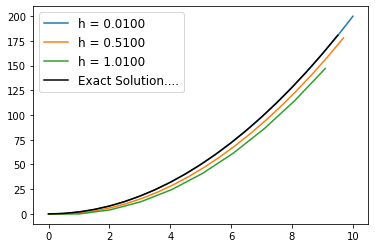

In [4]:
import matplotlib.pyplot as plt
import numpy as np
def f(pr,x,y):
    #pr is None
    return 4*x
x,y=0,0
h=0.01
xx=np.arange(0,10,0.5)
yy=2*xx**2
pr=None
dx=0.5
i=0
while h<1.05:
    X,Y,dYdX=Euler1D(f,pr,0,0,h,10)
    tt="h = %.4f "%(h)
    plt.plot(X,Y,label=tt)
    h=h+0.5
    i=i+1

plt.plot(xx,yy,'k',label='Exact Solution....')
plt.legend(loc='best',prop={'size':12})
plt.show()

$Radioactive~ Decay~ Problem$

$\frac{dN}{dt}$ = $-kN$

$N(0)=N_0$

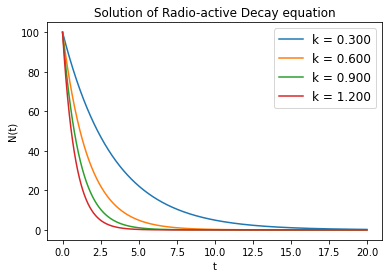

In [5]:
#x->t
#y->N
import numpy as np
import matplotlib.pyplot as plt
def f(pr,t,N):
    return -pr*N
k=0.30
dt=0.01
T=20
X=np.arange(0,20,0.01)
while k <1.5:
    xx,yy,dydx=Euler1D(f,k,0,100,dt,T)
    plt.plot(xx,yy,label="k = %.3f"%(k))
    k=k+0.3
plt.legend(loc='best',prop={'size':12})
plt.xlabel('t')
plt.ylabel('N(t)')
plt.title("Solution of Radio-active Decay equation")
plt.show()

$\frac{dy}{dx}~=~2y$

$ y(0)=5.0 $

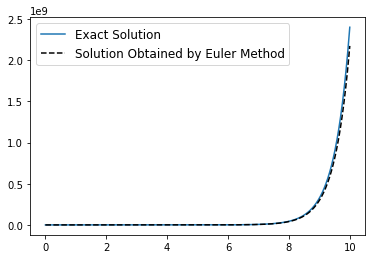

In [6]:
def f(pr,x,y):
    return 2*y
xx,yy,dydx=Euler1D(f,pr,0,5,0.005,10)

X=np.arange(0,10,0.005)
Y=5*np.exp(2*X)
plt.plot(X,Y,label='Exact Solution')
plt.plot(xx,yy,'k--',label='Solution Obtained by Euler Method')
plt.legend(loc='best',prop={'size':12})
plt.show()

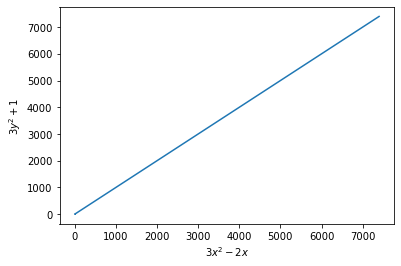

In [7]:
def f(pr,x,y):
    return (3*x**2-2*x)/(3*y**2+1)
xx,yy,dydx=Euler1D(f,None,0,0,0.01,50)
X=np.asarray(xx)
Y=np.asarray(yy)
plt.plot(3*X**2-2*X,3*Y**2+1)
plt.xlabel(r'$ 3x^2-2x $')
plt.ylabel(r'$3y^2+1$')

plt.show()

$\frac{dy}{dx}$= $- \omega^2 x$

$y(0)= \omega$

Exact solution : $y^2=-\omega^2x^2+\omega^2$

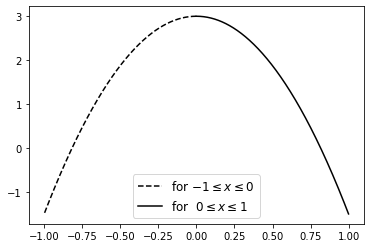

In [8]:
def f(pr,x,y):
    return -pr**2*x
omg=3
x,y=0,omg
pr=omg

#first plot : -1 to 0 
dx=-0.001
X=-1
xx1,yy1,dydx1=Euler1D(f,pr,x,y,dx,X)

#second plot : 0 to 1
dx=0.001
X=1
xx2,yy2,dydx2=Euler1D(f,pr,x,y,dx,X)
plt.plot(xx1,yy1,'k--',label=r'for $-1 \leq x \leq 0$')
plt.plot(xx2,yy2,'k-',label=r'for  $0 \leq x \leq 1$')
plt.legend(loc='best',prop={'size':12})
plt.show()

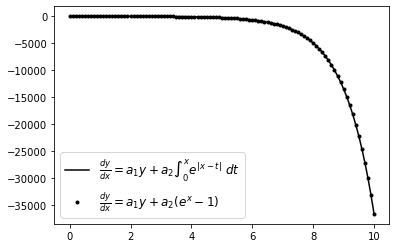

In [9]:
from simp13X import*
def fe(pr,t):
    return np.exp(pr-t)
def f(pr,x,y):
    a1,a2=pr
    I=simp13X(fe,x,0,x,1e-5)
    return a1*y+a2*I
def realf(pr,x,y):
    a1,a2=pr
    return a1*y+a2*(np.exp(x)-1)
pr=[-2,-5]
x,y=0,0
dx=0.01
X=10
xx1,yy1,dydx1=Euler1D(f,pr,x,y,dx,X)

x,y=0,0
dx=0.01
X=10
xx2,yy2,dydx2=Euler1D(realf,pr,x,y,dx,X)

plt.plot(xx1,yy1,'k',label=r'$\frac{dy}{dx} = a_1y+a_2 \int_{0}^{x} e^{|x-t|}~dt$')
plt.plot(xx2,yy2,'k.',markevery=10,label=r'$\frac{dy}{dx}= a_1y+a_2 (e^x - 1)$')
plt.legend(loc='best',prop={'size':12})
plt.show()

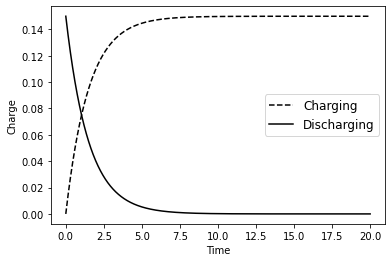

In [10]:
#y->q
#x->t
import matplotlib.pyplot as plt
def charge(pr,t,q):
    E,R,C=pr
    return (E/R)-(q/(C*R))
def discharge(pr,t,q):
    R,C=pr
    return -q/(C*R) 
E,R,C=10,100,0.015
#Plotting the Charging part
pr=[E,R,C]
t,q=0,0
dt=0.01
T=20
tt1,qq1,dqdt1=Euler1D(charge,pr,t,q,dt,T)
plt.plot(tt1,qq1,'k--',label='Charging')

#Plotting the Discharging part
pr=[R,C]
t,q=0,C*E
dt=0.01
T=20
tt2,qq2,dqdt2=Euler1D(discharge,pr,t,q,dt,T)
plt.plot(tt2,qq2,'k-',label='Discharging')
plt.legend(loc='best',prop={'size':12})
plt.xlabel('Time')
plt.ylabel('Charge')
plt.show()

$\huge Euler ~Method~ for~ Discrete ~Differential ~Equation$

In [11]:
def disEuler1D(fx,x,y):
    xx,yy,ddydx=[],[],[]
    k=0
    n=len(x)-1
    while True:
        dydx=fx[k]
        xx.append(x[k])
        yy.append(y)
        ddydx.append(dydx)
        h=x[k+1]-x[k]
        y=y+h*dydx
        k=k+1
        if k>=n:
            break
    return xx,yy,ddydx

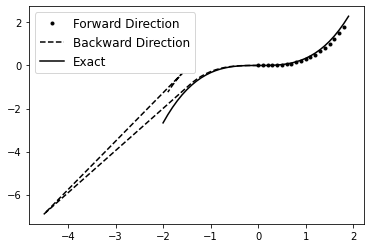

In [12]:
from math import*
import matplotlib.pyplot as plt
ob=open("x2.dat","r")
x,dydx=[],[]
while True:
    data=ob.readline().split()
    if not data:
        break
    
    x.append(float(data[0]))
    dydx.append(float(data[1]))
ob.close()
k=round(-x[0]/(x[1]-x[0]))
y=0

xx,yy,ddydx=disEuler1D(dydx[k::],x[k::],y)
plt.plot(xx,yy,'k.',label='Forward Direction')

xx,yy,ddydx=disEuler1D(dydx[k::-1],x[k::-1],y)   
plt.plot(xx,yy,'k--',label='Backward Direction')
xx=np.arange(-2,2,0.1)
yy=(1/3)*xx**3
plt.plot(xx,yy,'k-',label='Exact')
plt.legend(loc='best',prop={'size':12})
plt.show()


$\huge Improved ~Euler ~method ~for~ 1^{st} ~Order ~Diffferential~ Equations$

In [13]:
def imEuler1D(f,pr,x,y,dx,X):
    #f is the user defined function ..... dy/dx=f
    #pr is the parameter required for f
    #x is the given initial value of x
    #y is the given initial value of y
    #dx is the increment in x 
    #X is the maximum value of x
    xx,yy,ddydx=[],[],[]
    #xx is a list that stores all the x values needed for plotting
    #yy is a list that stores all the y values needed for plotting
    #ddydx is a list that stores all the dy/dx values 
    while abs(x)<=abs(X):
        dydx=0.5*(f(pr,x,y)+f(pr,x+dx,y+dx*f(pr,x,y)))
        xx.append(x)
        yy.append(y)
        ddydx.append(dydx)
        x=x+dx
        y=y+dx*dydx
    return xx,yy,ddydx        

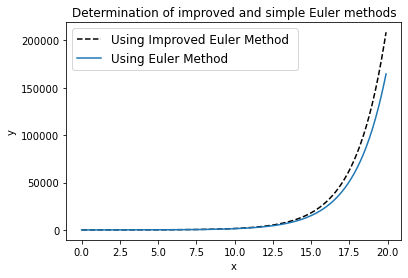

In [14]:
import matplotlib.pyplot as plt
from math import*
def f(pr,x,y):
    return 0.5*y
pr=None
x=0
y=10
dx=0.1
X=20
xx1,yy1,dydx1=imEuler1D(f,pr,x,y,dx,X)
plt.plot(xx1,yy1,'k--',markevery=1000,label='Using Improved Euler Method ')

pr=None
x=0
y=10
dx=0.1
X=20
xx1,yy1,dydx1=Euler1D(f,pr,x,y,dx,X)
plt.plot(xx1,yy1,label='Using Euler Method ')
plt.legend(loc='best',prop={'size':12})
plt.xlabel('x')
plt.ylabel('y')
plt.title('Determination of improved and simple Euler methods')
plt.show()

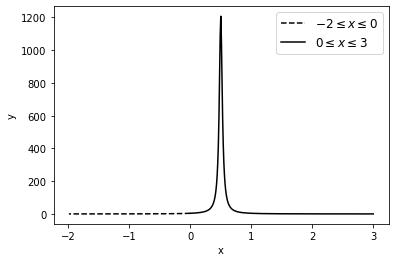

In [15]:
def f(pr,x,y):
    return (1-2*x)*y**2
pr=None
x=0
y=4
dx=-0.01
X=-2
xx,yy,dydx=imEuler1D(f,pr,x,y,dx,X)
plt.plot(xx,yy,'k--',label=r'$-2 \leq x \leq 0$')
pr=None
x=0
y=4
dx=0.01
X=3
xx,yy,dydx=imEuler1D(f,pr,x,y,dx,X)
plt.plot(xx,yy,'k-',label=r'$0 \leq x \leq 3$')
plt.legend(loc='best',prop={'size':12})
plt.xlabel('x')
plt.ylabel('y')
plt.show()


$\Huge Euler ~Method ~for~ Coupled ~1^{st} ~Order ~Differential ~Equations$

In [16]:
def coupeuler1D(f1,f2,pr1,pr2,x,y1,y2,dx,X):
    xx=[]
    yy1=[]
    ddydx1=[]
    yy2=[]
    ddydx2=[]
    while abs(x)<=abs(X):
        xx.append(x)
        yy1.append(y1)
        dydx1=f1(pr1,x,y1,y2)
        ddydx1.append(dydx1)
        yy2.append(y2)
        dydx2=f2(pr2,x,y1,y2)
        ddydx2.append(dydx2)
        y1=y1+dx*dydx1
        y2=y2+dx*dydx2
        x=x+dx
    return xx,[yy1,ddydx1],[yy2,ddydx2]


$\frac{dx}{dt}~=~ -u~cos~ \theta$

$\frac{dy}{dt}~=~u~sin~\theta ~-~gt$

$with~x(0)=y(0)=0$

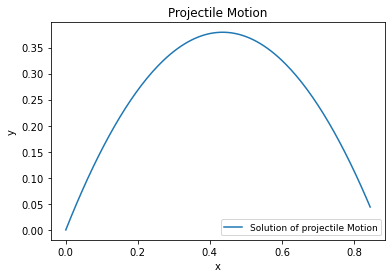

In [17]:
#f1=>x(y1)
#f2=>y(y2)
#x=>t
#f(pr,x,y1,y2)
#theta,u,g are parameters
import numpy as np
from math import*
import matplotlib.pyplot as plt
def fx(ux,t,x,y):
    return ux
def fy(uy,t,x,y):
    g=1
    return uy-g*t
u=1
th=np.pi/3
t=0
x=0
y=0
dt=0.01
T=1.7
ux=u*np.cos(th)
uy=u*np.sin(th)
tt,[xx,ddydx1],[yy,ddydx2]=coupeuler1D(fx,fy,ux,uy,t,x,y,dt,T)
plt.plot(xx,yy,label='Solution of projectile Motion')
plt.legend(loc='best',prop={'size':9})
plt.xlabel('x')
plt.ylabel('y')
plt.title("Projectile Motion")
plt.show()

$\frac{dx}{dt}~=~x+0.5y$

$\frac{dy}{dt}~=~0.5x+y$

$with ~x(0)=-1~ and ~y(0)=1$

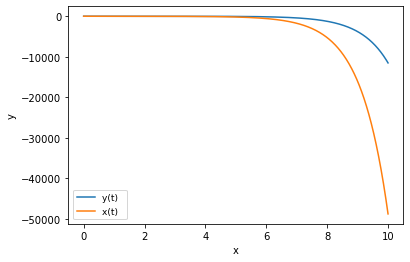

In [18]:

import numpy as np
from math import*
import matplotlib.pyplot as plt
def fx(pr1,t,x,y):
    return pr1[0]*x+pr1[1]*y
def fy(pr2,t,x,y):
    return pr2[0]*x-pr2[1]*y
pr1=[1,0.5]
pr2=[0.5,1]
t=0
x=-1
y=1
dt=0.01
T=10
tt,[xx,ddydx1],[yy,ddydx2]=coupeuler1D(fx,fy,pr1,pr2,t,x,y,dt,T)
plt.plot(tt,yy,label='y(t)  ')
plt.plot(tt,xx,label='x(t)  ')
plt.legend(loc='best',prop={'size':9})
plt.xlabel('x')
plt.ylabel('y')
plt.show()

$\frac {dI_1}{dt} = 6-4I_1+3I_2$

$\frac{dI_2}{dt} = 3.6-2.4I_1+1.6I_2$

$I_1(0)=I_2(0)=0$

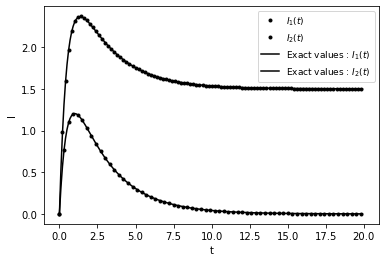

In [19]:
def f1(pr1,t,I1,I2):
    #pr1=[6,-4,3]
    return pr1[0]+pr1[1]*I1+pr1[2]*I2
def f2(pr2,t,I1,I2):
    #pr2=[3.6,-2.4,1.6]
    return pr2[0]+pr2[1]*I1+pr2[2]*I2
pr1=[6,-4,3]
pr2=[3.6,-2.4,1.6]
t=0
I1=0
I2=0
dt=0.01
T=20
tt,[I1,ddydx1],[I2,ddydx2]=coupeuler1D(f1,f2,pr1,pr2,t,I1,I2,dt,T)
plt.plot(tt,I1,'k.',markevery=20,label=r'$I_1(t) $')
plt.plot(tt,I2,'k.',markevery=30,label=r'$I_2(t)  $')
tt=np.arange(0,20,0.1)
plt.plot(tt,-3.375*np.exp(-2*tt)+1.875*np.exp(-0.4*tt)+1.5,'k-',label=r'Exact values : $I_1(t)  $')
plt.plot(tt,-2.25*np.exp(-2*tt)+2.25*np.exp(-0.4*tt),'k-',label=r'Exact values : $I_2(t)  $')
plt.legend(loc='best',prop={'size':9})
plt.xlabel('t')
plt.ylabel('I')
plt.show()

$The~ Lotka~ Voltera ~Model$

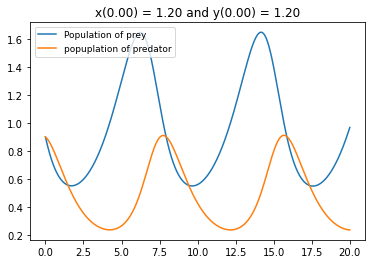

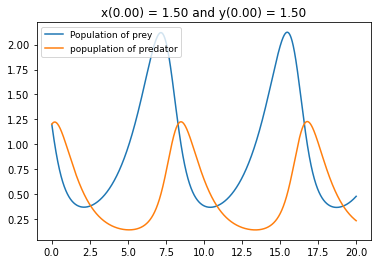

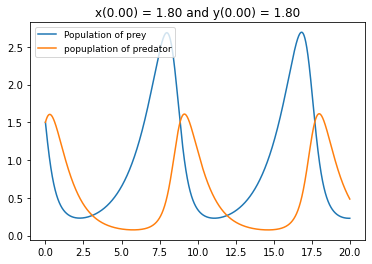

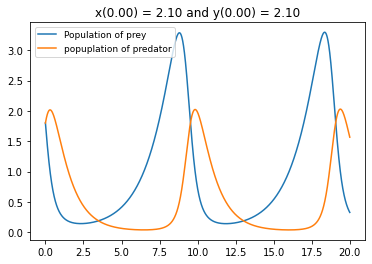

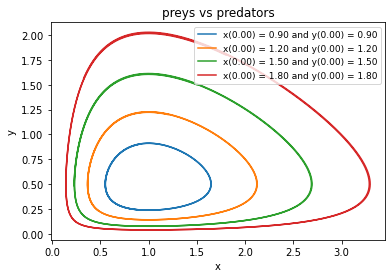

In [20]:
def fx(pr1,t,x,y):
    #pr1=[alp,-bet]
    return pr1[0]*x+pr1[1]*x*y
def fy(pr2,t,x,y):
    #pr2=[gam,delt]
    return -pr2[0]*y+pr2[1]*x*y
alp,bet,gam,delt=(2/3),(4/3),1,1
pr1=[alp,-bet]
pr2=[gam,delt]

A=0.9#A=0.9,1.2,1.5,1.8
dt=0.001
T=20
while A<=2:
    x=A
    y=A
    t=0
    tt,[xx,ddydx1],[yy,ddydx2]=coupeuler1D(fx,fy,pr1,pr2,t,x,y,dt,T)
    plt.plot(tt,xx,label='Population of prey')
    plt.plot(tt,yy,label='popuplation of predator')
    #plt.plot(tt,ddydx1,label='Rate of Prey')
    #plt.plot(tt,ddydx2,label='Rate of Predator')
    A=A+0.3
    plt.title('x(%.2f) = %.2f and y(%.2f) = %.2f'%(t,A,t,A))
    plt.legend(loc='best',prop={'size':9})
    plt.show()
    plt.clf()

A=0.9#A=0.9,1.2,1.5,1.8
dt=0.001
T=20
while A<=2:
    x=A
    y=A
    t=0
    tt,[xx,ddydx1],[yy,ddydx2]=coupeuler1D(fx,fy,pr1,pr2,t,x,y,dt,T)
    plt.plot(xx,yy,label='x(%.2f) = %.2f and y(%.2f) = %.2f'%(t,A,t,A))
    
    #plt.plot(tt,ddydx1,label='Rate of Prey')
    #plt.plot(tt,ddydx2,label='Rate of Predator')
    A=A+0.3
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend(loc='best',prop={'size':9})
    plt.title("preys vs predators")
plt.show()


$\huge Euler~Method ~for~2^{nd}~Order ~Differential ~Equation$

In [21]:
def Euler2D(f,pr,x,y,dydx,dx,X):
    xx=[]
    yy=[]
    ddydx=[]
    dd2ydx2=[]
    while abs(x)<abs(X):
        xx.append(x)
        yy.append(y)
        d2ydx2=f(pr,x,y,dydx)
        dd2ydx2.append(d2ydx2)
        ddydx.append(dydx)
        dydx=dydx+d2ydx2*dx
        x=x+dx
        y=y+dydx*dx
    return xx,yy,ddydx,dd2ydx2

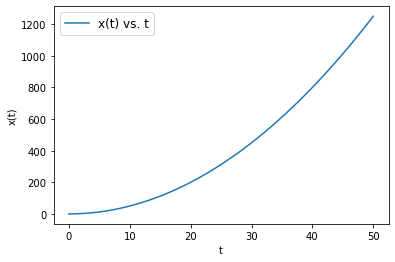

In [22]:
import matplotlib.pyplot as plt
def f(pr,t,x,dxdt):
    return pr
a=1
pr=a
t=0
x=0
dxdt=0
dt=0.01
T=50
tt,xx,ddydx,dd2ydx2=Euler2D(f,pr,t,x,dxdt,dt,T)
plt.plot(tt,xx,label='x(t) vs. t')
plt.xlabel('t')
plt.ylabel('x(t)')
plt.legend(loc='best',prop={'size':12})
plt.show()

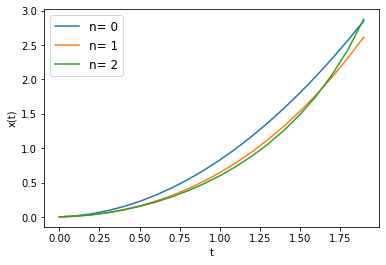

In [23]:
import matplotlib.pyplot as plt
def f(pr,t,x,dxdt):
    #pr=[a,b,n]
    return pr[0]-pr[1]*(dxdt)**pr[2]
a=1
b=-0.5
n=0

t=0
x=0
dxdt=0
dt=0.1
T=2
while n<3:
    pr=[a,b,n]
    tt,xx,ddydx,dd2ydx2=Euler2D(f,pr,t,x,dxdt,dt,T)
    plt.plot(tt,xx,label='n= %d'%n)
    plt.legend(loc='best',prop={'size':12})
    n=n+1


plt.xlabel('t')
plt.ylabel('x(t)')

plt.show()

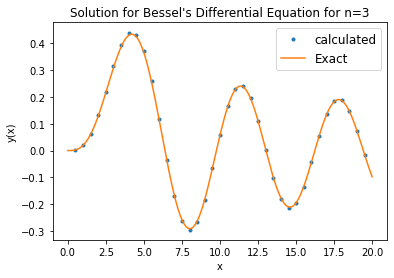

In [24]:
import matplotlib.pyplot as plt
import scipy.special as ss
def f(pr,x,y,dydx):
    #pr=n
    return (-x*dydx-(x**2-pr**2)*y)/x**2
n=3
pr=n
x=0.5
y=0.0025637
dydx=0.0152216
dx=0.01
X=20
xx,yy,ddydx,dd2ydx2=Euler2D(f,pr,x,y,dydx,dx,X)
plt.plot(xx,yy,'.',markevery=50,label='calculated')
xx=np.arange(0,20,0.01)
yy=ss.jv(n,xx)
plt.plot(xx,yy,'-',label='Exact')
plt.xlabel('x')
plt.ylabel('y(x)')
plt.legend(loc='best',prop={'size':12})
plt.title("Solution for Bessel's Differential Equation for n=3")
plt.show()

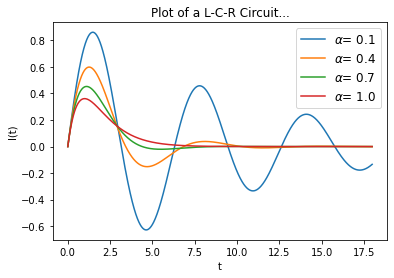

In [25]:
import matplotlib.pyplot as plt
def f(pr,t,I,dIdt):
    #pr=[alp,omg]
    return -2*pr[0]*dIdt-pr[1]*I
omg=1
alp=0.1
t=0
I=0
dIdt=1
dt=0.01
T=18
while alp<1.3:
    pr=[alp,omg]
    tt,II,ddydx,dd2ydx2=Euler2D(f,pr,t,I,dIdt,dt,T)
    plt.plot(tt,II,label=r'$\alpha$= %.1f'%alp)
    plt.legend(loc='best',prop={'size':12})
    alp=alp+0.3

plt.title('Plot of a L-C-R Circuit...')
plt.xlabel('t')
plt.ylabel('I(t)')

plt.show()

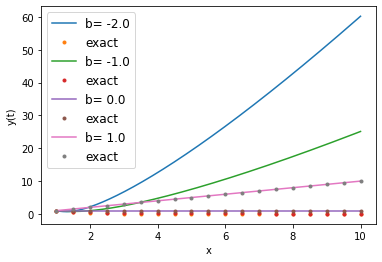

In [26]:
import matplotlib.pyplot as plt
def f(pr,x,y,dydt):
    
    return (1/y)*(dydx)**2-(1/x)*(dydx)
a=1
b=-2
pr=None


dx=0.01
X=10
xxx=np.arange(1,10.2,0.5)
while b<=1:
    x=1
    y=a
    dydx=a*b
    xx,yy,ddydx,dd2ydx2=Euler2D(f,pr,x,y,dydx,dx,X)
    plt.plot(xx,yy,'-',markevery=100,label=r'b= %.1f'%b)
    plt.plot(xxx,a*xxx**b,'.',label='exact')
    plt.legend(loc='best',prop={'size':12})
    b=b+1


plt.xlabel('x')
plt.ylabel('y(t)')

plt.show()

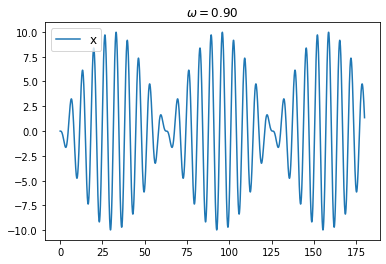

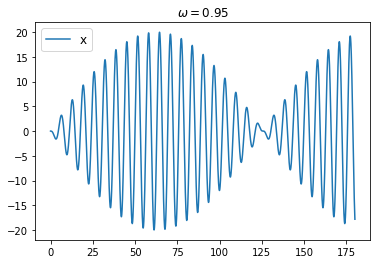

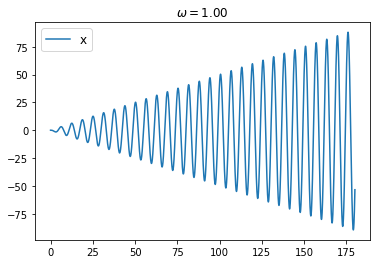

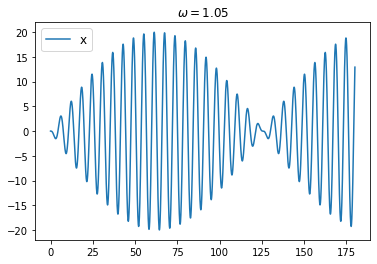

Text(0, 0.5, 'I(t)')

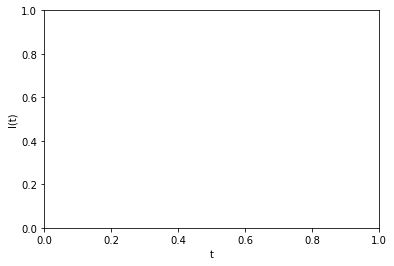

In [27]:
import matplotlib.pyplot as plt
import numpy as np
def f(pr,t,x,dxdt):
    #pr=[omg_0,omg,F_0]
    return -pr[0]**2*x-pr[2]*np.sin(pr[1]*t)
omg_0,omg,F_0=1,0.9,1
pr=[omg_0,omg,F_0]
t=0
x=0
dxdt=0
dt=0.01
T=180
while omg<=1.05:
    pr=[omg_0,omg,F_0]
    tt,II,ddydx,dd2ydx2=Euler2D(f,pr,t,x,dxdt,dt,T)
    plt.plot(tt,II,label='x')
    plt.title(r'$\omega = %.2f$'%omg)
    plt.legend(loc='best',prop={'size':12})
    omg=omg+0.05
    plt.show()

plt.xlabel('t')
plt.ylabel('I(t)')



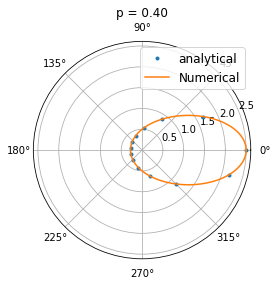

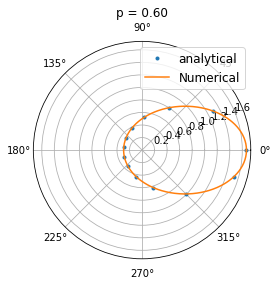

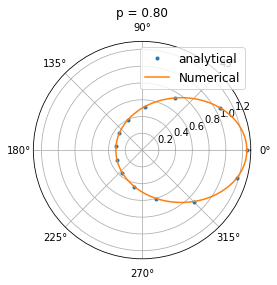

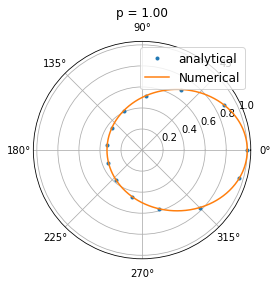

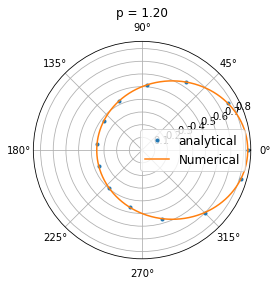

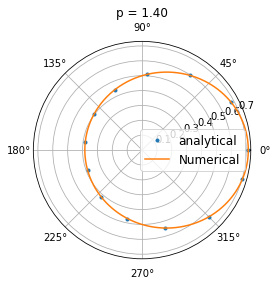

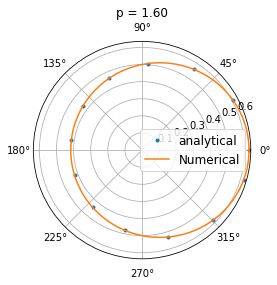

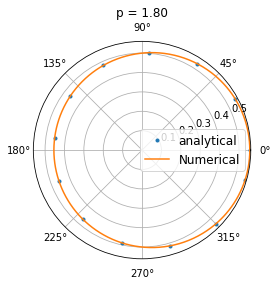

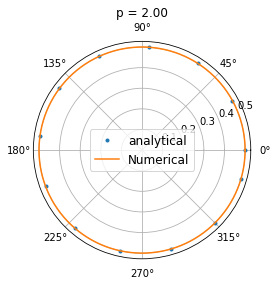

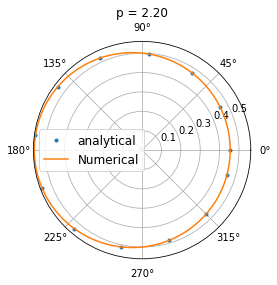

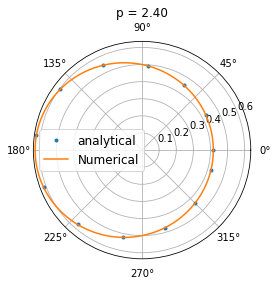

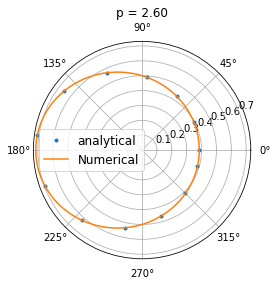

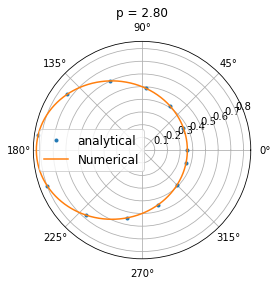

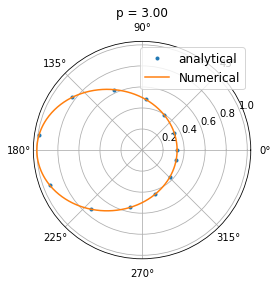

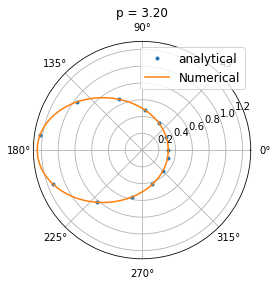

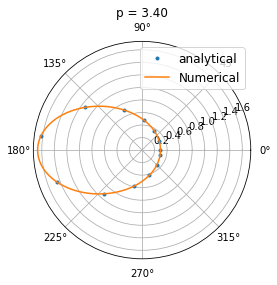

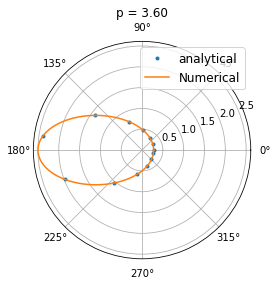

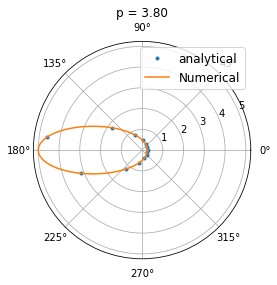

In [28]:
def fu(k,u):
    return -k*u**2
def f(k,th,u,dudth):
    return -u-(1/u**2)*fu(k,u)
k=2
th=0
p=k-0.8*k
dudth=0
dth=0.01
Th=2*np.pi
while p<=2*k:
    u=p
    tth,U,ddydx,dd2ydx2=Euler2D(f,k,th,u,dudth,dth,Th)
   
    r=[1/U[i] for i in range(len(U))]
    plt.polar(tth,r,'.',markevery=50,label='analytical')
    tth=np.arange(0,2*np.pi,0.01)
    plt.polar(tth,1/(k+(p-k)*np.cos(tth)),'-',label='Numerical')
    plt.title(r'p = %.2f'%p)
    plt.legend(loc='best',prop={'size':12})
    p=p+0.2
    plt.show()


$\huge Euler~Method~for~Coupled~2^{nd}~Order ~Differential~Equations$

In [29]:
def coupEuler2D(f1,f2,pr1,pr2,x,y1,y2,dy1dx,dy2dx,dx,X):
    xx=[]
    yy1,ddy1dx,dd2y1dx2=[],[],[]
    yy2,ddy2dx,dd2y2dx2=[],[],[]
    while abs(x)<= abs(X):
        d2y1dx2=f1(pr1,x,y1,y2,dy1dx,dy2dx)
        dd2y1dx2.append(d2y1dx2)
        xx.append(x)
        yy1.append(y1)
        ddy1dx.append(dy1dx)
        dy1dx=dy1dx+dx*d2y1dx2
        x=x+dx
        y1=y1+dx*dy1dx
        
        
        d2y2dx2=f2(pr2,x,y1,y2,dy1dx,dy2dx)
        dd2y2dx2.append(d2y2dx2)
        yy2.append(y2)
        ddy2dx.append(dy2dx)
        dy2dx=dy2dx+dx*d2y2dx2
        y2=y2+dx*dy2dx
    return xx,[yy1,ddy1dx,dd2y1dx2],[yy2,ddy2dx,dd2y2dx2]

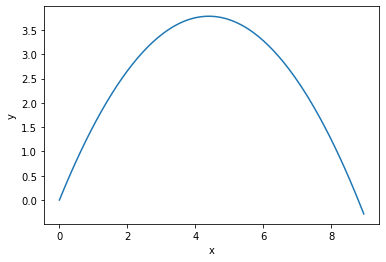

In [30]:
def fx(pr1,t,x,y,dxdt,dydt):
    return 0
def fy(pr2,t,x,y,dxdt,dydt):
    return -pr2
pr1=None
pr2=9.8
t=0
x=0
y=0
u=10
th=np.pi/3
dxdt=u*np.cos(th)
dydt=u*np.sin(th)
dt=0.01
T=1.8
tt,[xx,ddy1dx,dd2y1dx2],[yy,ddy2dx,dd2y2dx2]=coupEuler2D(fx,fy,pr1,pr2,t,x,y,dxdt,dydt,dt,T)
plt.plot(xx,yy)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

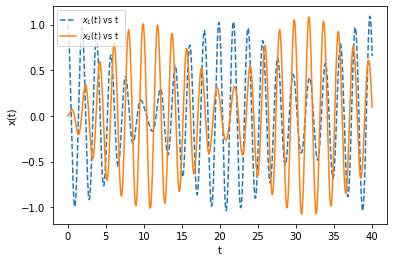

In [31]:
def fx1(pr1,t,x1,x2,dx1dt,dx2dt):
    #pr1=[k1,k2]
    return -pr1[0]*x1+pr1[1]*(x2-x1)
def fx2(pr2,t,x1,x2,dx1dt,dx2dt):
    #pr2=[k1,k2]
    return -pr2[0]*x2-pr1[1]*(x2-x1)
k1=10
k2=1
pr1=[k1,k2]
pr2=[k1,k2]
t=0
x1=1
x2=0

dx1dt=0
dx2dt=0
dt=0.05
T=40
tt,[xx1,ddy1dx,dd2y1dx2],[xx2,ddy2dx,dd2y2dx2]=coupEuler2D(fx1,fx2,pr1,pr2,t,x1,x2,dx1dt,dx2dt,dt,T)
plt.plot(tt,xx1,'--',label=r'$x_1(t)$ vs t  ')
plt.plot(tt,xx2,label=r'$x_2(t)$ vs t  ')
plt.legend(loc='best',prop={'size':8})
plt.xlabel('t')
plt.ylabel('x(t)')
plt.show()

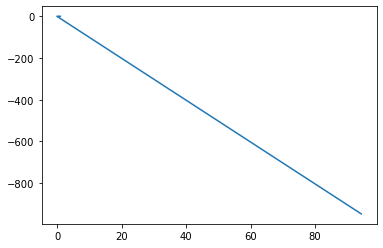

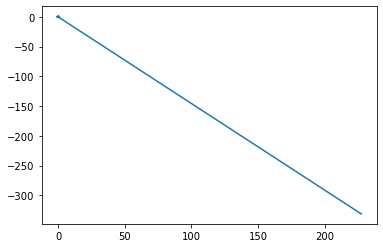

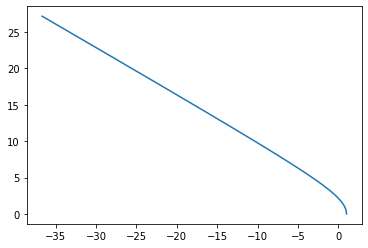

Text(0, 0.5, 'y')

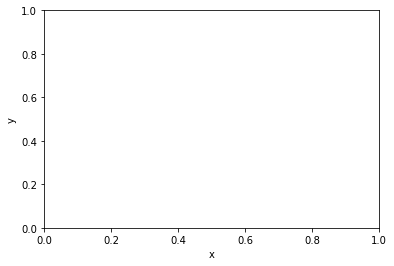

In [32]:
def fx(pr1,t,x,y,dxdt,dydt):
    return -x/(x**2+y**2)**1.5
def fy(pr2,t,x,y,dxdt,dydt):
    return -y/(x**2+y**2)**1.5
pr1=None
pr2=None
p=[0.5,1,1.5]
t=0
x=1
y=0
dxdt=0

dt=0.05
T=80
for dydt in p:
    t=0
    x=1
    y=0
    dxdt=0
    tt,[xx,ddy1dx,dd2y1dx2],[yy,ddy2dx,dd2y2dx2]=coupEuler2D(fx,fy,pr1,pr2,t,x,y,dxdt,dydt,dt,T)
    plt.plot(xx,yy,label=r'plot for y vs x for $v_y= %.2f$'%dydt)
    plt.show()


plt.xlabel('x')
plt.ylabel('y')


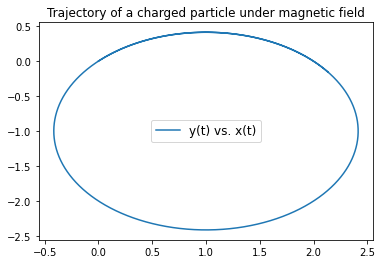

In [33]:
def fx(pr1,t,x,y,dxdt,dydt):
    return pr1*dydt
def fy(pr2,t,x,y,dxdt,dydt):
    return -pr2*dxdt
pr1=pr2=1
t=0
x=y=0
dxdt=dydt=1
dt=0.001
T=8
tt,[xx,ddy1dx,dd2y1dx2],[yy,ddy2dx,dd2y2dx2]=coupEuler2D(fx,fy,pr1,pr2,t,x,y,dxdt,dydt,dt,T)
plt.plot(xx,yy,label='y(t) vs. x(t)')
plt.legend(loc='best',prop={'size':12})
plt.title("Trajectory of a charged particle under magnetic field")
plt.show()

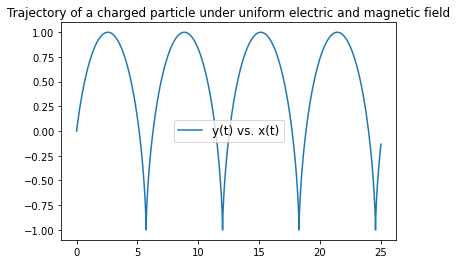

In [34]:
def fx(pr1,t,x,y,dxdt,dydt):
    return pr1*dydt
def fy(pr2,t,x,y,dxdt,dydt):
    return pr2[0]-pr2[1]*dxdt
pr1=1
pr2=[1,1]
t=0
x=y=0
dxdt=dydt=1
dt=0.001
T=25
tt,[xx,ddy1dx,dd2y1dx2],[yy,ddy2dx,dd2y2dx2]=coupEuler2D(fx,fy,pr1,pr2,t,x,y,dxdt,dydt,dt,T)
plt.plot(xx,yy,label='y(t) vs. x(t)')
plt.legend(loc='best',prop={'size':12})
plt.title("Trajectory of a charged particle under uniform electric and magnetic field")
plt.show()

$\huge Runge-Kutta~Method ~for~solving~Initial~Value~Problems$

$4^{th} ~Order ~Runge-Kutta~Method~$

In [35]:
def RK4_1D(f,pr,x,y,dx,X):
    #f=f(pr,x,y)
    #x is the initial value of independent variable
    #y is the initial value of dependent variable
    #dx is the increment id=n the x-values 
    #X is the final value of x
    xx,yy,ddydx=[],[],[]
    while abs(x)<abs(X):
        k1=dx*f(pr,x,y)
        k2=dx*f(pr,x+0.5*dx,y+0.5*k1)
        k3=dx*f(pr,x+0.5*dx,y+0.5*k2)
        k4=dx*f(pr,x+dx,y+k3)
        dy=(1/6)*(k1+2*k2+2*k3+k4)
        xx.append(x)
        yy.append(y)
        ddydx.append(dy/dx)
        x=x+dx
        y=y+dy
    return xx,yy,ddydx

$\frac{dy}{dx}=x^4y$

with $y(1.0)=1.0$

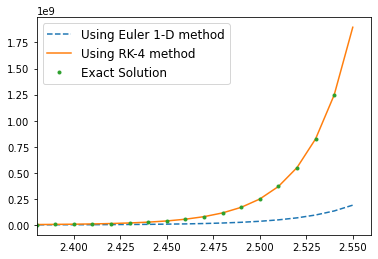

In [36]:
import numpy as np
import matplotlib.pyplot as plt
def f(pr,x,y):
    return x**4*y
def exc(x):
    return np.exp(x**5/5)/np.exp(1/5)
pr=None
x=1
y=1
dx=0.01
X=2.55
xx,yy,ddydx=Euler1D(f,pr,x,y,dx,X)
plt.plot(xx,yy,'--',markevery=10,label="Using Euler 1-D method")
xx,yy,ddydx=RK4_1D(f,pr,x,y,dx,X)
plt.plot(xx,yy,'-',label="Using RK-4 method")
xx=np.arange(1,2.55,0.01)
plt.xlim(2.38,2.56)
plt.plot(xx,exc(xx),'.',label="Exact Solution")
plt.legend(loc='best',prop={'size':12})

plt.show()

$Bernoulli's~ Equation$

$\frac{dy}{dx}=f(x)~y+g(x)~y^{\mu}$

$y(x_0)=y_0$

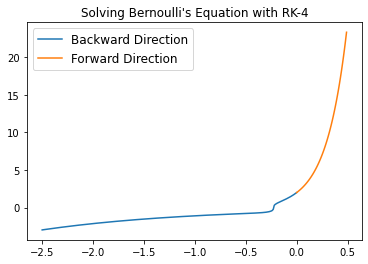

In [37]:
def f(x):
    return 5
def g(x):
    return np.exp(-2*x)
def F(pr,x,y):
    return f(x)*y+g(x)*y**pr
pr=-2
x0,y0=0,2
dx=-0.01
X0=-2.5
xx,yy,ddydx=RK4_1D(F,pr,x0,y0,dx,X0)
plt.plot(xx,yy,label='Backward Direction')
dx=0.01
X0=0.5
xx,yy,ddydx=RK4_1D(F,pr,x0,y0,dx,X0)
plt.plot(xx,yy,label='Forward Direction')
plt.legend(loc='best',prop={'size':12})
plt.title("Solving Bernoulli's Equation with RK-4")
plt.show()

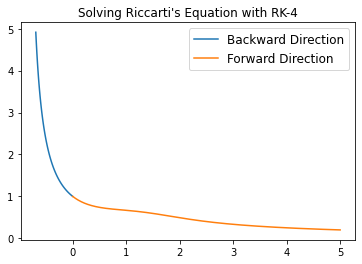

In [38]:
def F(pr,x,y):
    return pr*y**2-y*x**2+x
pr=-1
x0,y0=0,1
dx=-0.01
X0=-0.7
xx,yy,ddydx=RK4_1D(F,pr,x0,y0,dx,X0)
plt.plot(xx,yy,label='Backward Direction')
dx=0.01
X0=5
xx,yy,ddydx=RK4_1D(F,pr,x0,y0,dx,X0)
plt.plot(xx,yy,label='Forward Direction')
plt.legend(loc='best',prop={'size':12})
plt.title("Solving Riccarti's Equation with RK-4")
plt.show()

$Moton~of ~a ~Rocket$

$m\frac{dv}{dt}+v_0\frac{dm}{dt}=F$

with $v(0)=0$

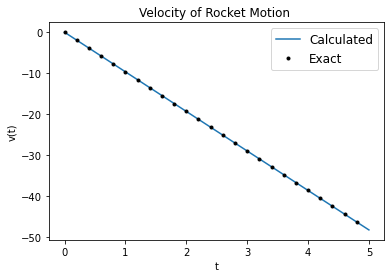

In [39]:
from dfdx3 import*
def mass(pr,t):
    #pr=[m0,apl]
    m0,apl=pr
    return m0-apl*t
def f(pr,t,v):
    #pr=[m0,apl,g,v0]
    m0,apl,g,v0=pr
    m=mass([m0,apl],t)
    dmdt=dfdx3(mass,[m0,apl],t,1e-5)
    return -g-(v0*dmdt)/m
m0,apl,g,v0=5,0.3,9.8,2
pr=[m0,apl,g,v0]
t=0
v=0
dt=0.01
T=5
tt,vv,ddydx=RK4_1D(f,pr,t,v,dt,T)
plt.plot(tt,vv,label='Calculated')
tt=np.arange(0,5,0.01)
plt.plot(tt,-g*tt+v0*np.log(m0/(m0-apl*tt)),'k.',markevery=20,label='Exact')
plt.legend(loc='best',prop={'size':12})
plt.title("Velocity of Rocket Motion ")
plt.xlabel('t')
plt.ylabel('v(t)')
plt.show()

$Fourth~ Order~ Runga~ Kutta~ Method ~for~ Coupled~ 1^{st}~ Order~ Differential~ Equation$

In [40]:
def coupRK4_1D(f1,f2,pr1,pr2,x,y1,y2,dx,X):
    #f1=f1(pr1,x,y1,y2)
    #f2=f2(pr2,x,y1,y2)
    #x is the initial value of independent variable
    #y1 is the initial value of dependent variable y1
    #y2 is the initial value of dependent variable y2
    #dx is the increment id=n the x-values 
    #X is the final value of x
    xx=[]
    yy1,ddy1dx=[],[]
    yy2,ddy2dx=[],[]
    while abs(x)<abs(X):
        k1=dx*f1(pr1,x,y1,y2)
        l1=dx*f2(pr2,x,y1,y2)
        k2=dx*f1(pr1,x+0.5*dx,y1+0.5*k1,y2+0.5*l1)
        l2=dx*f2(pr2,x+0.5*dx,y1+0.5*k1,y2+0.5*l1)
        k3=dx*f1(pr1,x+0.5*dx,y1+0.5*k2,y2+0.5*l2)
        l3=dx*f2(pr2,x+0.5*dx,y1+0.5*k2,y2+0.5*l2)
        k4=dx*f1(pr1,x+dx,y1+k3,y2+l3)
        l4=dx*f2(pr2,x+dx,y1+k3,y2+l3)
        dy1=(1/6)*(k1+2*k2+2*k3+k4)
        dy2=(1/6)*(l1+2*l2+2*l3+l4)
        xx.append(x)
        yy1.append(y1)
        yy2.append(y2)
        ddy1dx.append(dy1/dx)
        ddy2dx.append(dy2/dx)
        x=x+dx
        y1=y1+dy1
        y2=y2+dy2
    return xx,[yy1,ddy1dx],[yy2,ddy2dx]

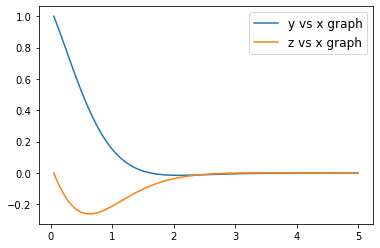

In [41]:
def fy(pr1,x,y,z):
    return z+y*((y**2+z**2)**0.5-2*pr1)
def fz(pr2,x,y,z):
    return -y+z*((y**2+z**2)**0.5-2*pr2)
pr1=pr2=1
x=0.05
y=1
z=0
dx=0.05
X=5
xx,[yy1,ddy1dx],[zz1,ddy2dx]=coupRK4_1D(fy,fz,pr1,pr2,x,y,z,dx,X)
plt.plot(xx,yy1,label='y vs x graph')
plt.plot(xx,zz1,label='z vs x graph')
plt.legend(loc='best',prop={'size':12})
plt.show()

$Runge~Kutta~method~for~2nd~order~differential~$

In [2]:
def RK4_2D(f,pr,x,y,dydx,dx,X):
    #f is the R.H.S of the differential equation
    #pr is the tunable parameter from the main used in the function f
    #x is the initial given value of x
    #dydx is the given initial value of dy/dx at the given value of x
    #dx is the increment id=n the x-values 
    #X is the final value of x
    xx=[]
    yy=[]
    ddydx=[]
    ddy2dx2=[]
    while abs(x)<abs(X):
        k11=dx*dydx
        k21=dx*f(pr,x,y,dydx)
        k12=dx*(dydx+0.5*k21)
        k22=dx*f(pr,x+0.5*dx,y+0.5*k11,dydx+0.5*k21)
        k13=dx*(dydx+0.5*k22)
        k23=dx*f(pr,x+0.5*dx,y+0.5*k12,dydx+0.5*k22)
        k14=dx*(dydx+k23)
        k24=dx*f(pr,x+dx,y+k13,dydx+k23)
        dy=(1/6)*(k11+2*k12+2*k13+k14)
        dy2=(1/6)*(k21+2*k22+2*k23+k24)
        
        d2ydx2=dy/dx
        xx.append(x)
        yy.append(y)
        ddydx.append(dydx)
        ddy2dx2.append(d2ydx2) 
        
        x=x+dx
        y=y+dy
        dydx=dydx+dy2
    return xx,yy,ddydx,ddy2dx2

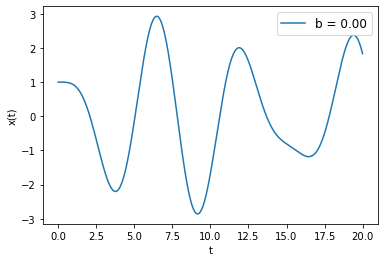

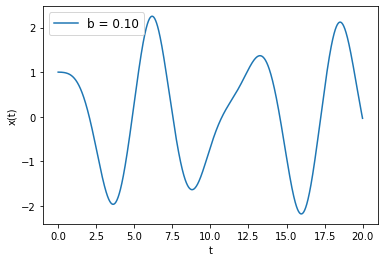

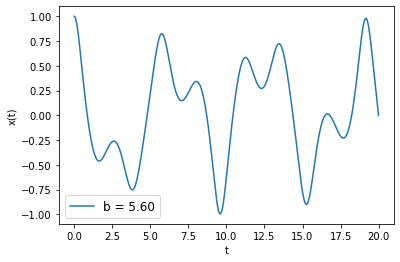

In [3]:
import numpy as np
import matplotlib.pyplot as plt
def f(pr,t,x,dxdt):
    a,b,gam,omg=pr
    return -a*x-b*x**3+gam*np.cos(omg*t)

b=[0,0.1,5.6]
a,gam,omg=2,2,1
t=0.
x=1
dxdt=0
dt=0.01
T=20
for i in range(len(b)):
    pr=[a,b[i],gam,omg]
    tt,xx,ddydx,dd2ydx2=RK4_2D(f,pr,t,x,dxdt,dt,T)
    plt.plot(tt,xx,label='b = %.2f'%b[i])
    plt.xlabel('t')
    plt.ylabel('x(t)')
    plt.legend(loc='best',prop={'size':12})
    plt.show()

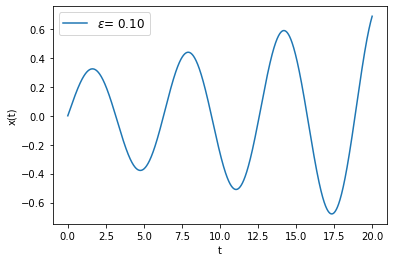

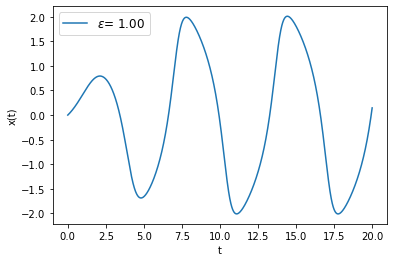

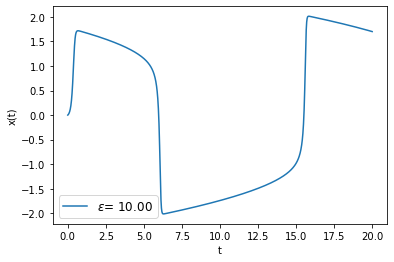

In [44]:
import numpy as np
import matplotlib.pyplot as plt
def f(pr,t,x,dxdt):
    return pr*(1-x**2)*dxdt-x

pr=[0.1,1,10]
t=0
x=0
dxdt=0.3
dt=0.01
T=20
for i in range(len(b)):
    
    tt,xx,ddydx,dd2ydx2=RK4_2D(f,pr[i],t,x,dxdt,dt,T)
    plt.plot(tt,xx,label=r'$\epsilon $= %.2f'%pr[i])
    plt.xlabel('t')
    plt.ylabel('x(t)')
    plt.legend(loc='best',prop={'size':12})
    plt.show()

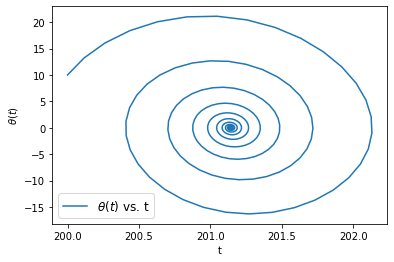

In [45]:
import numpy as np
import matplotlib.pyplot as plt
def f(pr,t,x,dxdt):
    return 31-390*np.sin(x)-3.12*dxdt

pr=None
t=0.
x=200
dxdt=10
dt=0.01
T=20
tt,xx,ddydx,dd2ydx2=RK4_2D(f,pr,t,x,dxdt,dt,T)
plt.plot(xx,ddydx,label=r'$\theta(t)$ vs. t')
plt.xlabel('t')
plt.ylabel(r'$\theta(t)$')
plt.legend(loc='best',prop={'size':12})
plt.show()

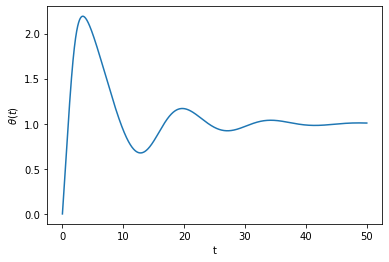

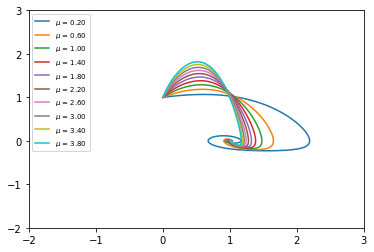

In [46]:
import numpy as np
import matplotlib.pyplot as plt
def f(pr,t,x,dxdt):
    return pr*(1-x**2*dxdt-x)


pr=0.2
t=0
x=0
dxdt=1
dt=0.01
T=50
tt,xx,ddydx,dd2ydx2=RK4_2D(f,pr,t,x,dxdt,dt,T)
plt.plot(tt,xx,label=r'$\theta(t)$ vs. t')
plt.xlabel('t')
plt.ylabel(r'$\theta(t)$')
plt.show()
while pr<4:
    tt,xx,ddydx,dd2ydx2=RK4_2D(f,pr,t,x,dxdt,dt,T)
    plt.plot(xx,ddydx,label=r'$\mu$ = %.2f'%pr)
    plt.ylim(-2,3)
    plt.xlim(-2,3)
    pr=pr+0.4
plt.legend(loc='best',prop={'size':7})
plt.show()

$\huge 4^{th}~Order ~Runge-Kutta~method~for ~2^{nd}~Order~Coupled~Differential~Equation$

In [1]:
def coupRK4_2D(f1,f2,pr1,pr2,x,y1,y2,dy1dx,dy2dx,dx,X):
    #f(pr,x,y1,y2,dy1dx,dy2dx)
    xx=[]
    yy1=[]
    ddy1dx=[]
    dd2y1dx2=[]
    yy2=[]
    ddy2dx=[]
    dd2y2dx2=[]
    
    while abs(x)<abs(X):
        xx.append(x) 
        l11=dx*dy1dx
        k11=dx*f1(pr1,x,y1,y2,dy1dx,dy2dx)
        l21=dx*dy2dx
        k21=dx*f2(pr2,x,y1,y2,dy1dx,dy2dx)
        l12=dx*(dy1dx+0.5*k11)
        k12=dx*f1(pr1,x+0.5*dx,y1+0.5*l11,y2+0.*l21,dy1dx+0.5*k11,dy2dx+0.5*k21)
        l22=dx*(dy2dx+0.5*k21)
        k22=dx*f2(pr2,x+0.5*dx,y1+0.5*l11,y2+0.5*l21,dy1dx+0.5*k11,dy2dx+0.5*k21)
        l13=dx*(dy1dx+0.5*k12)
        k13=dx*f1(pr1,x+0.5*dx,y1+0.5*l12,y2+0.5*l22,dy1dx+0.5*k12,dy2dx+0.5*k22)
        l23=dx*(dy2dx+0.5*k22)
        k23=dx*f2(pr2,x+0.5*dx,y1+0.5*l12,y2+0.5*l22,dy1dx+0.5*k12,dy2dx+0.5*k22)
        l14=dx*(dy1dx+k13)
        k14=dx*f1(pr1,x+dx,y1+l13,y2+l23,dy1dx+k13,dy2dx+k23)
        l24=dx*(dy2dx+k23)
        k24=dx*f2(pr2,x+dx,y1+l13,y2+l23,dy1dx+k13,dy2dx+k23)
        dy1=(1/6)*(l11+2*l12+2*l13+l14)
        dy1dx1=(1/6)*(k11+2*k12+2*k13+k14)
        d2y1dx2=dy1/dx
        yy1.append(y1)
        ddy1dx.append(dy1dx)
        dd2y1dx2.append(d2y1dx2)
        dy2=(1/6)*(l21+2*l22+2*l23+l24)
        dy2dx1=(1/6)*(k21+2*k22+2*k23+k24)
        d2y2dx2=dy2/dx
        yy2.append(y2)
        ddy2dx.append(dy2dx)
        dd2y2dx2.append(d2y2dx2)
        y1=y1+dy1
        dy1dx+=dy1dx1
        y2+=dy2
        dy2dx+=dy2dx1
        x+=dx
    return xx,[yy1,ddy1dx,dd2y1dx2],[yy2,ddy2dx,dd2y2dx2]

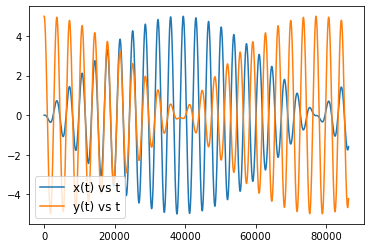

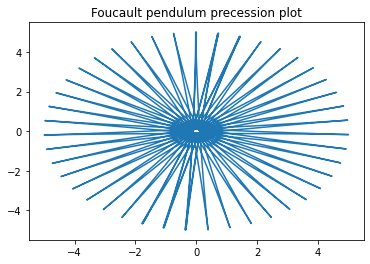

In [48]:
def f1(pr1,t,x,y,dxdt,dydt):
    omg,lam,g_l=pr1
    return 2*dydt*omg*np.sin(lam)-g_l*x
def f2(pr2,t,x,y,dxdt,dydt):
    omg,lam,g_l=pr2
    return -2*dxdt*omg*np.sin(lam)-g_l*y
def exc(pr,t,x0,y0):
    omg,lam,g_l=pr
    omg1=omg*np.sin(lam)
    omg2=(omg1**2+g_l)**0.5
    x=x0*np.cos(omg1*t)*np.cos(omg2*t)+y0*np.sin(omg1*t)*np.cos(omg2*t)
    y=-x0*np.sin(omg1*t)*np.cos(omg2*t)+y0*np.cos(omg1*t)*np.cos(omg2*t)
    return x,y
omg=7.27e-5
g=9.8
l=3.2e6
g_l=g/l
lam=34
lam=lam*np.pi*(1/180)
pr1=pr2=pr=[omg,lam,g_l]
x0=0
y0=5
t=0
x=x0
y=y0
dxdt=0
dydt=0
dt=0.5
T=86400
tt,[xx,ddy1dx,dd2y1dx2],[yy,ddy2dx,dd2y2dx2]=coupRK4_2D(f1,f2,pr1,pr2,t,x,y,dxdt,dydt,dt,T)
plt.plot(tt,xx,label='x(t) vs t')
plt.plot(tt,yy,label='y(t) vs t')
plt.legend(loc='best',prop={'size':12})
plt.show()
plt.plot(xx,yy)
plt.title("Foucault pendulum precession plot")
plt.show()


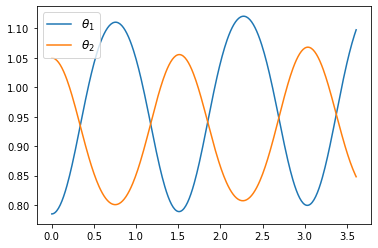

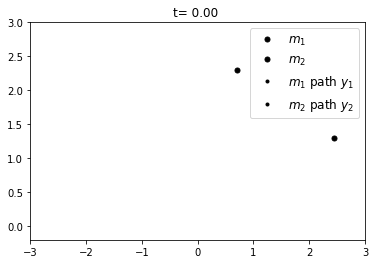

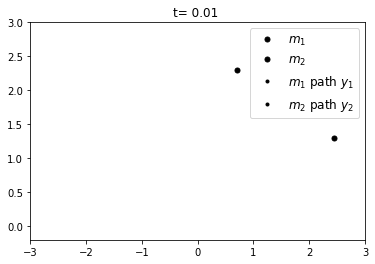

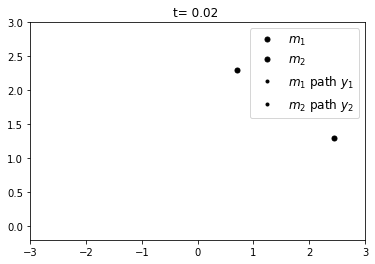

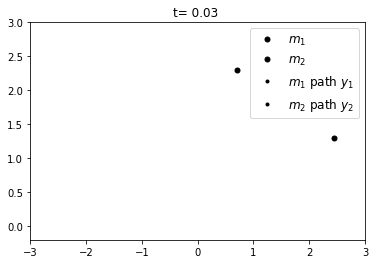

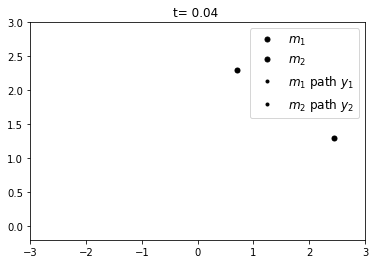

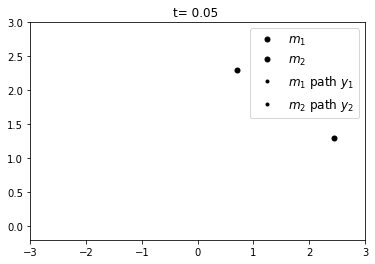

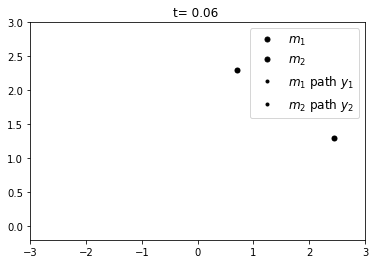

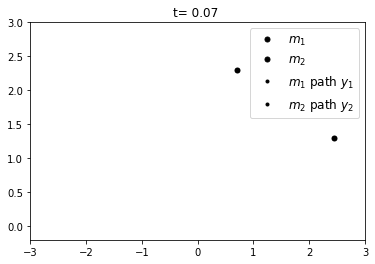

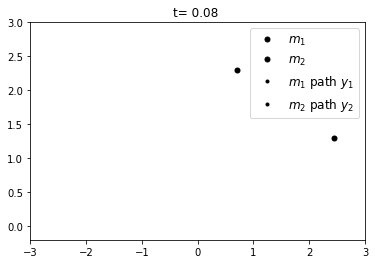

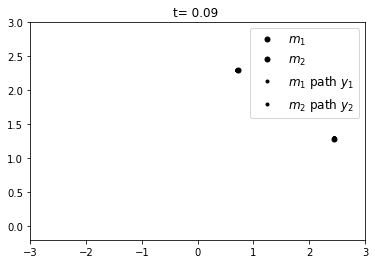

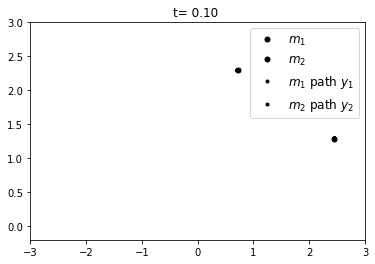

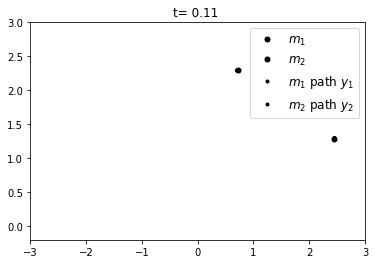

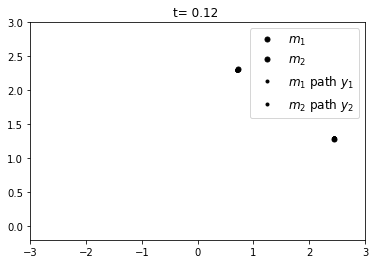

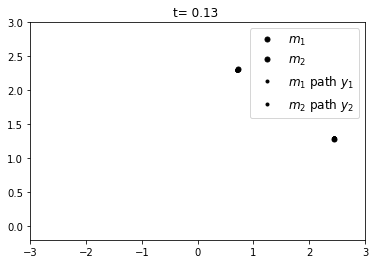

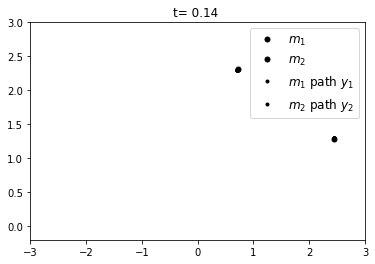

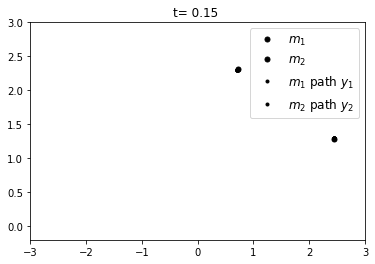

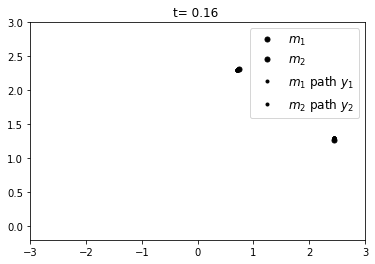

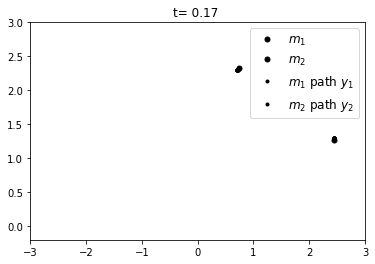

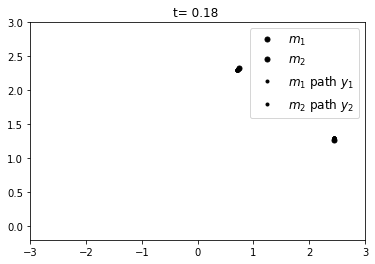

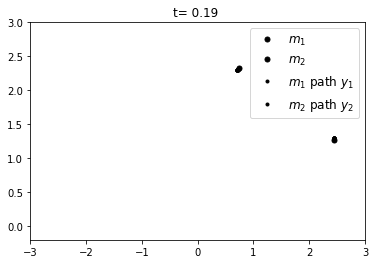

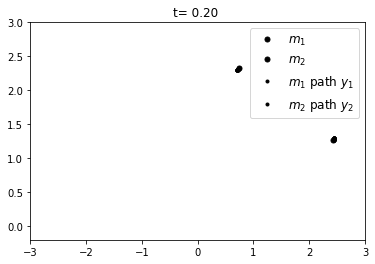

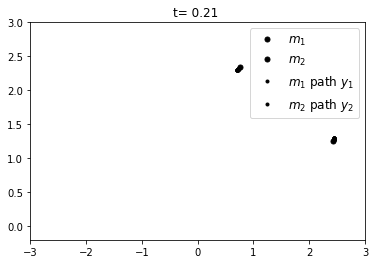

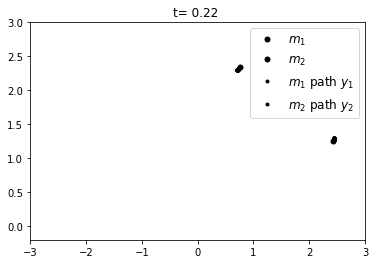

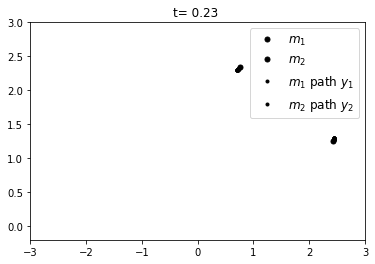

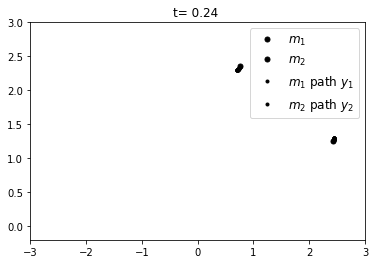

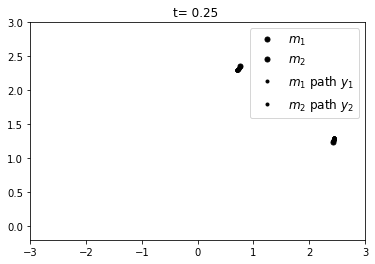

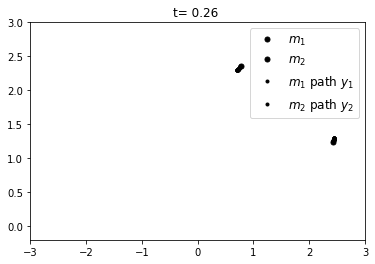

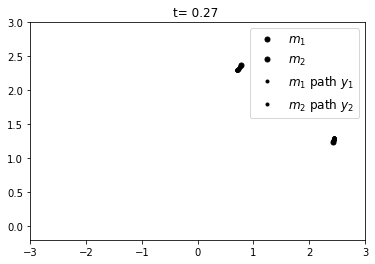

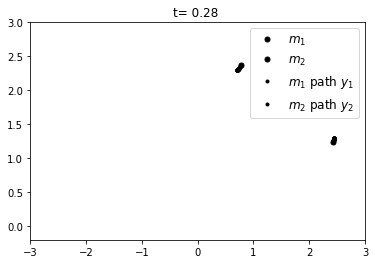

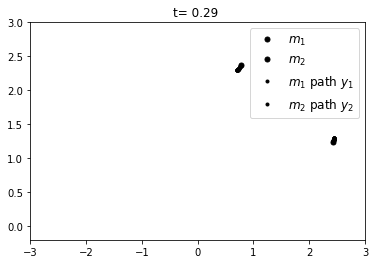

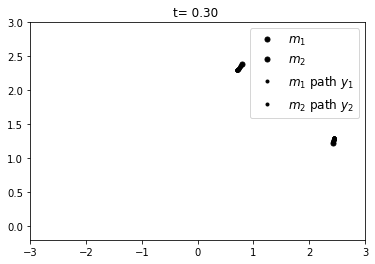

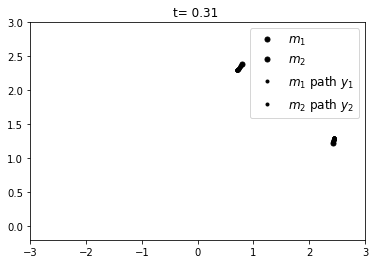

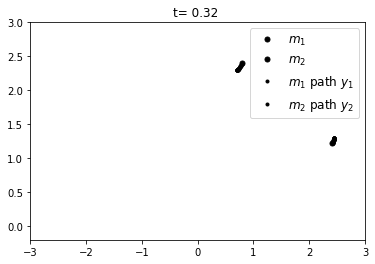

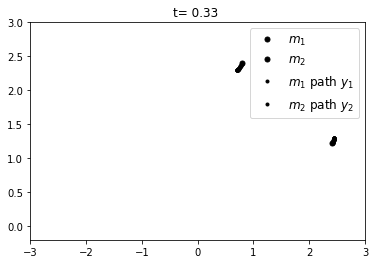

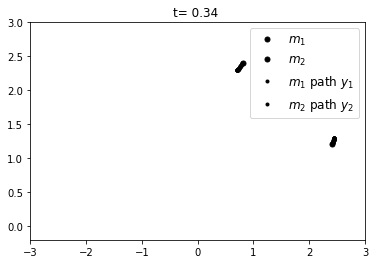

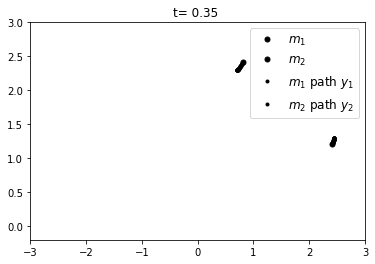

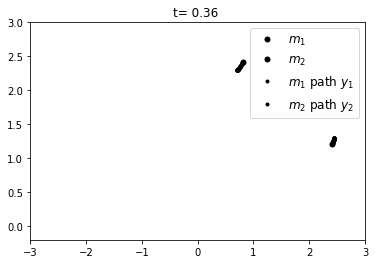

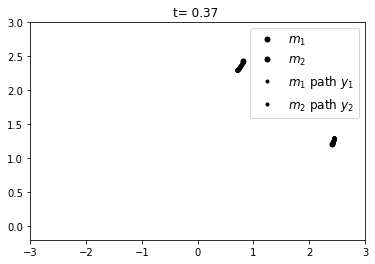

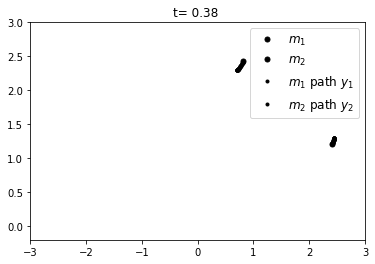

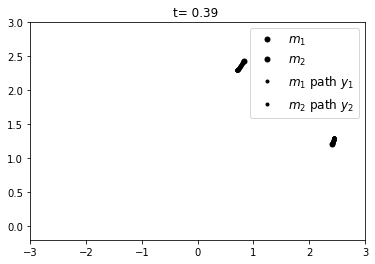

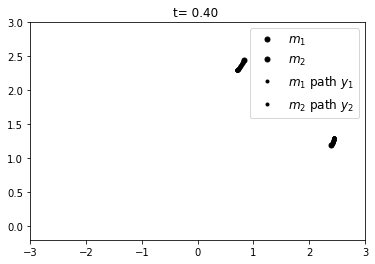

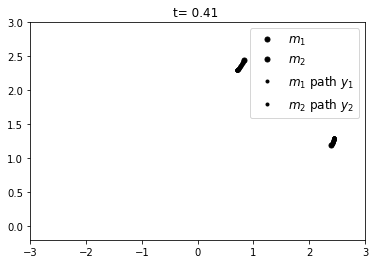

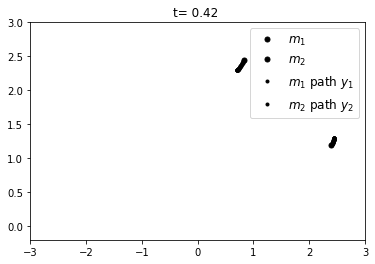

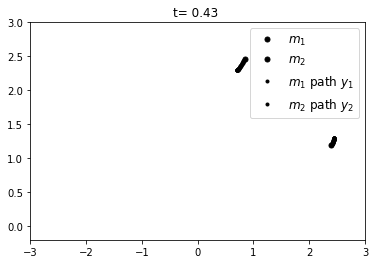

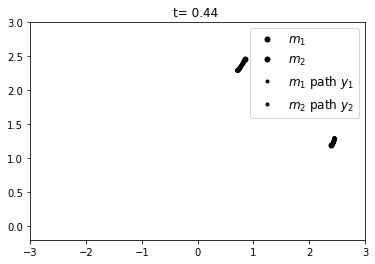

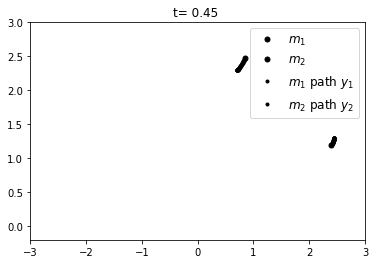

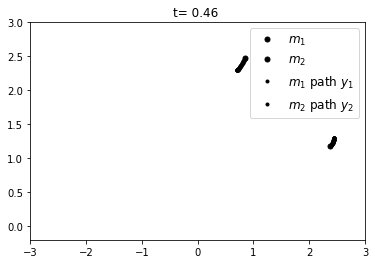

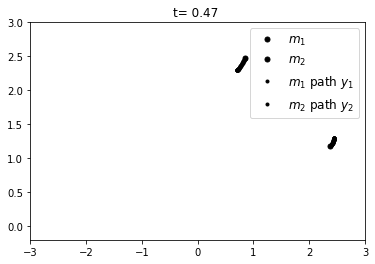

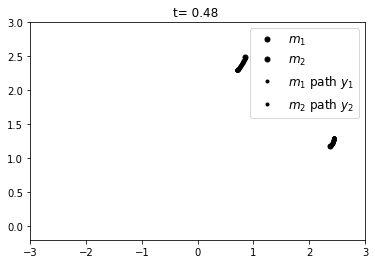

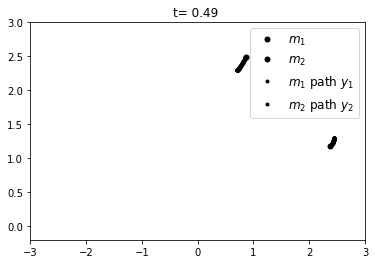

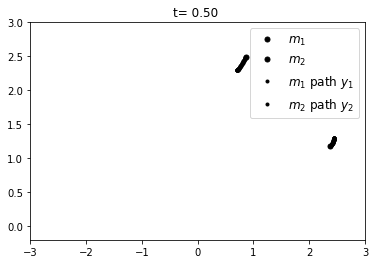

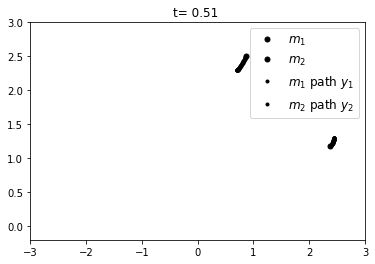

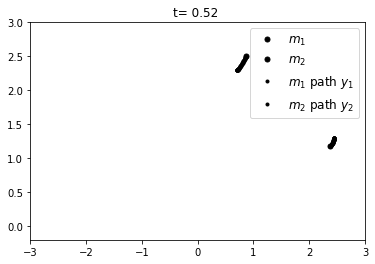

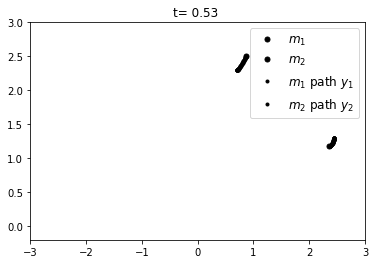

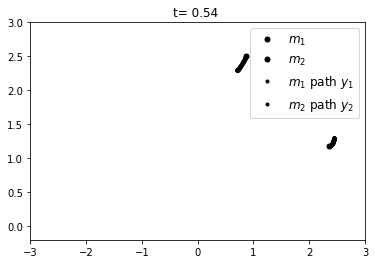

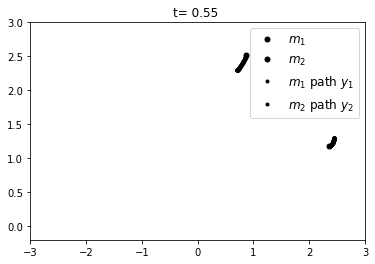

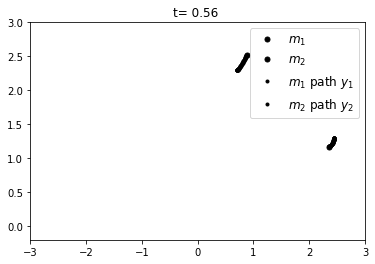

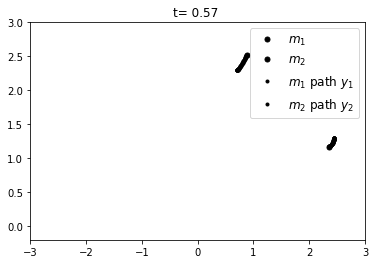

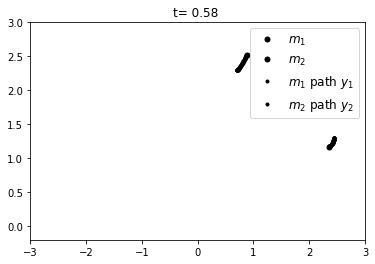

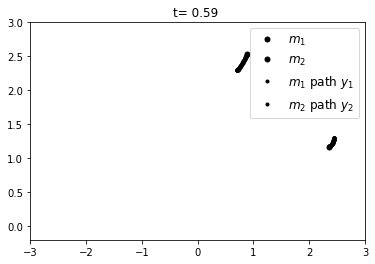

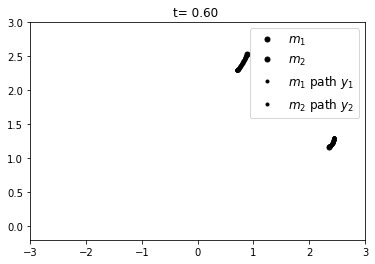

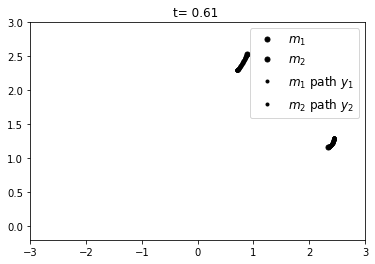

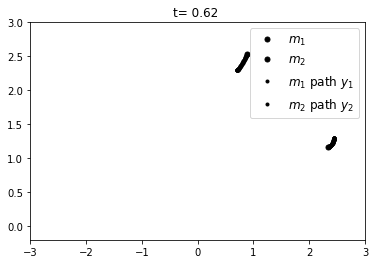

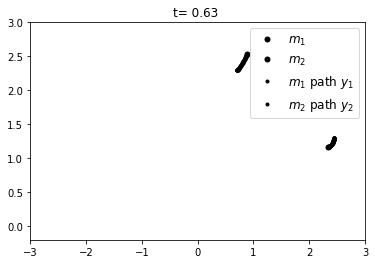

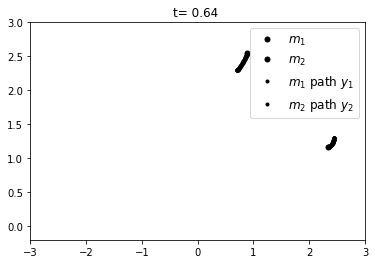

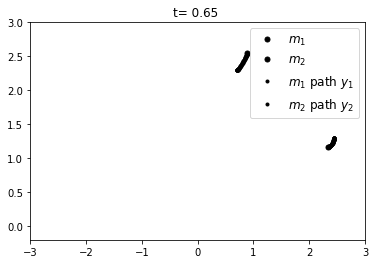

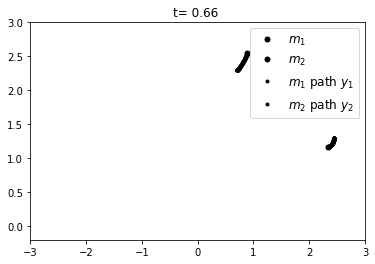

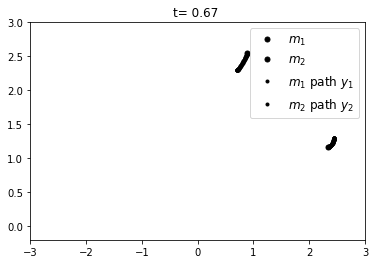

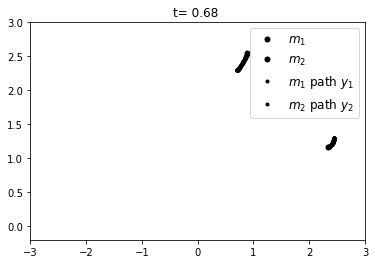

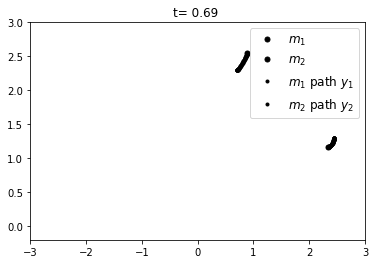

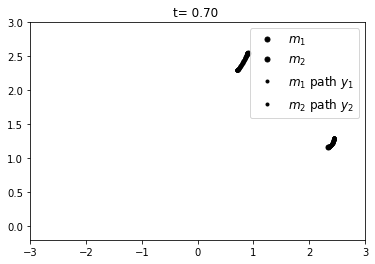

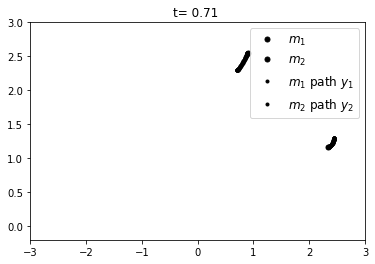

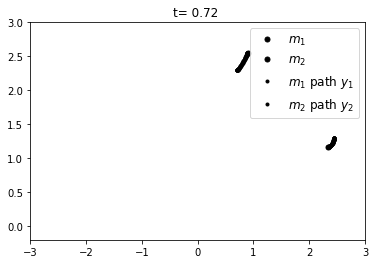

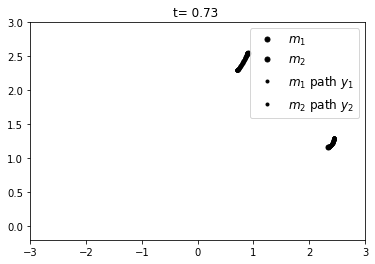

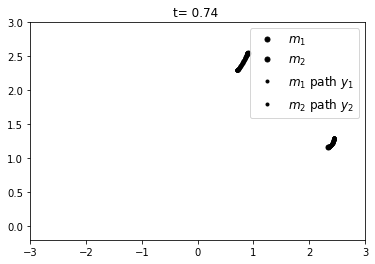

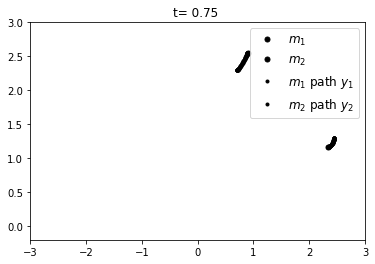

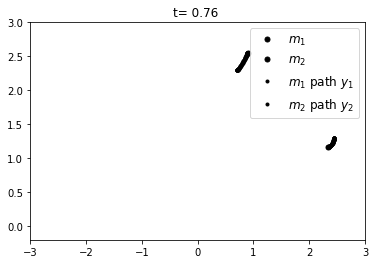

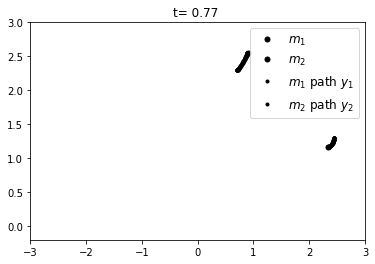

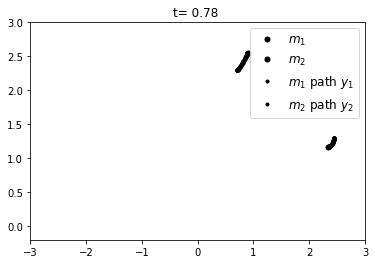

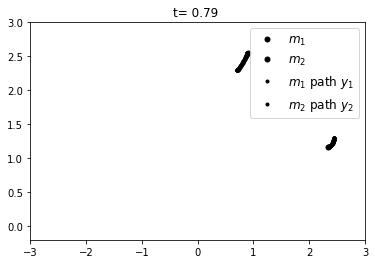

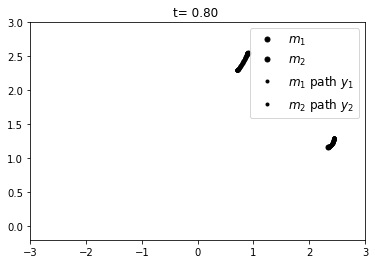

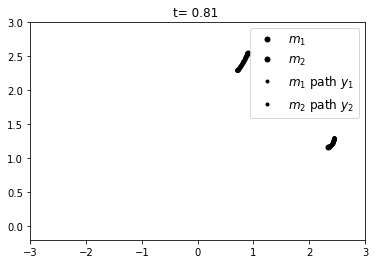

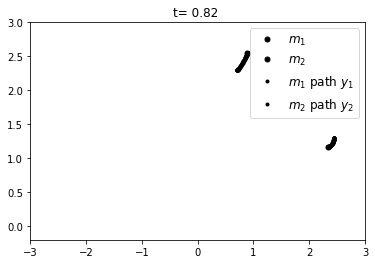

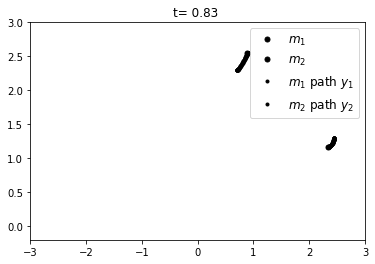

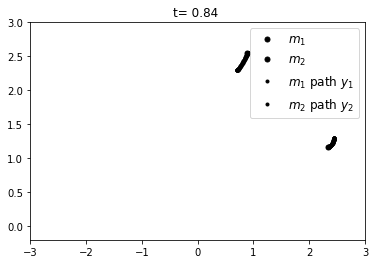

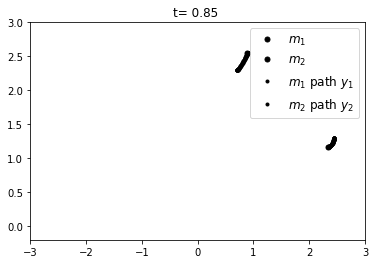

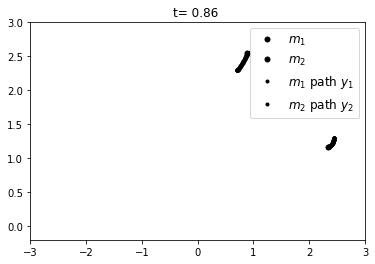

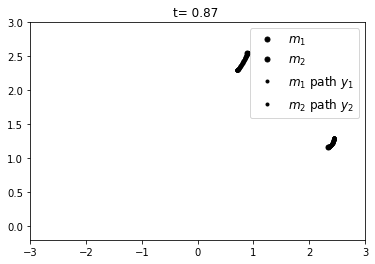

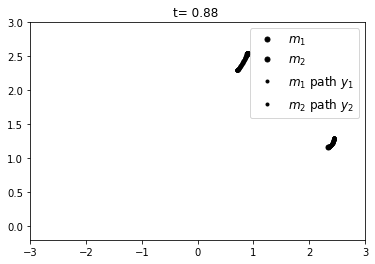

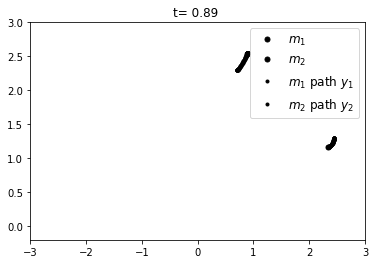

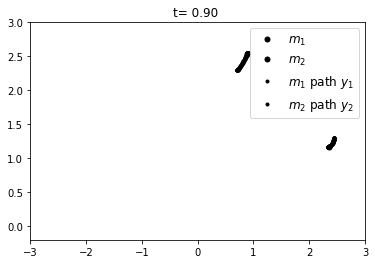

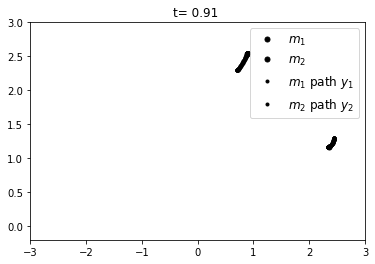

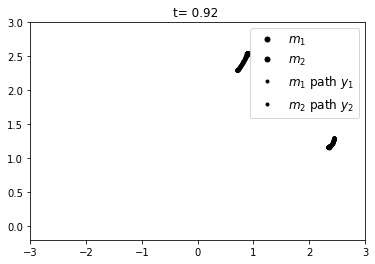

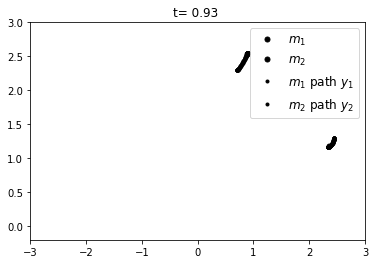

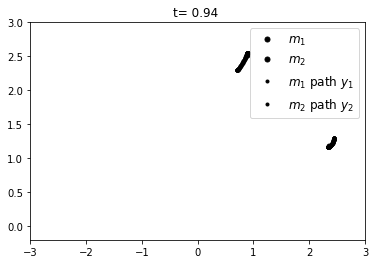

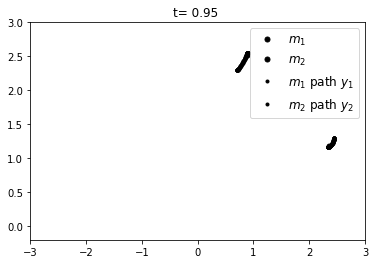

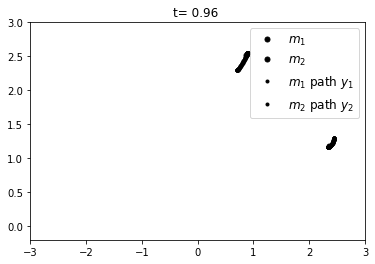

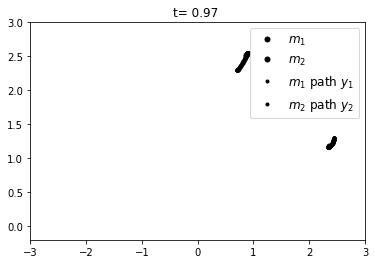

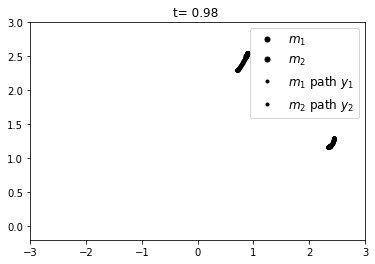

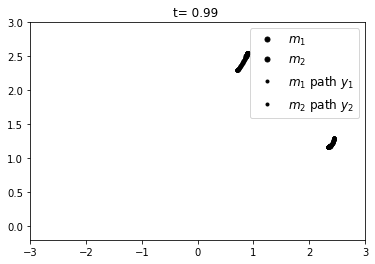

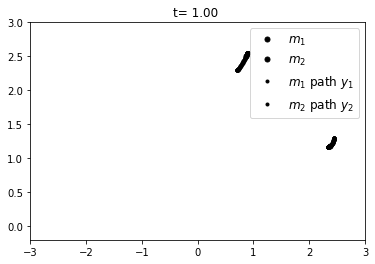

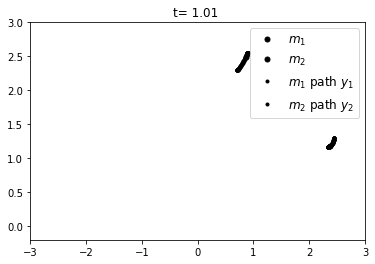

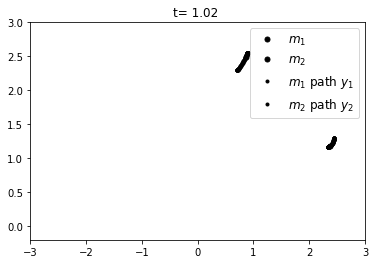

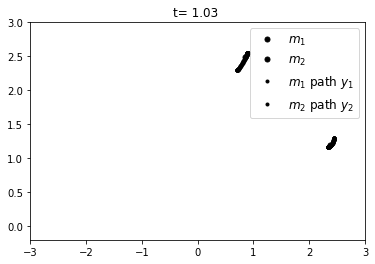

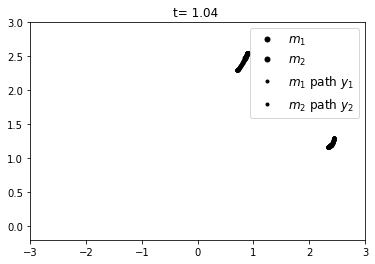

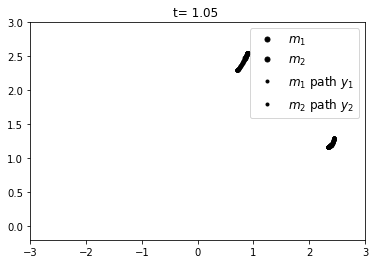

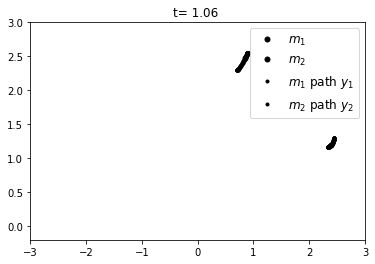

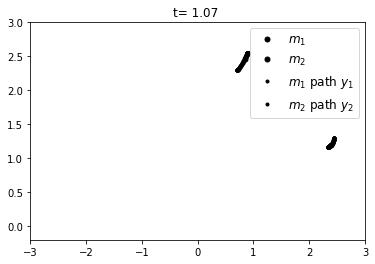

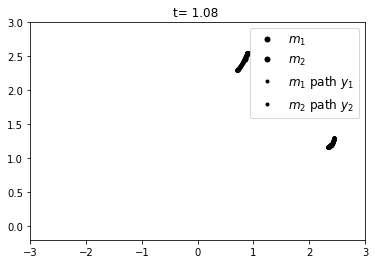

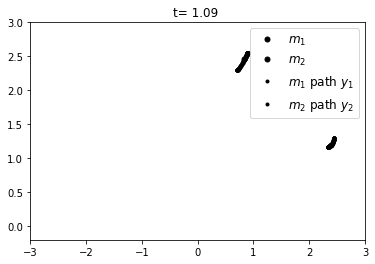

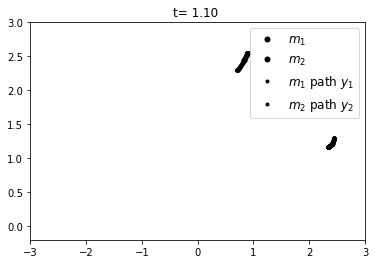

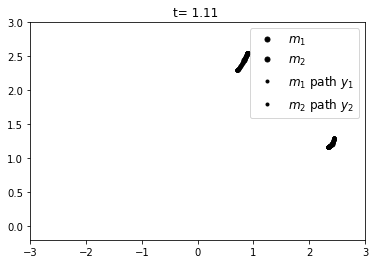

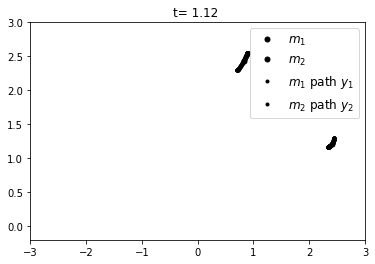

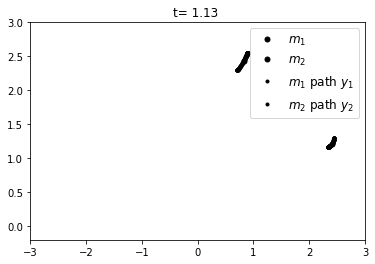

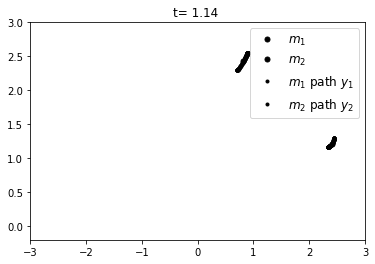

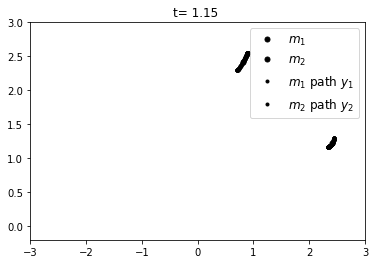

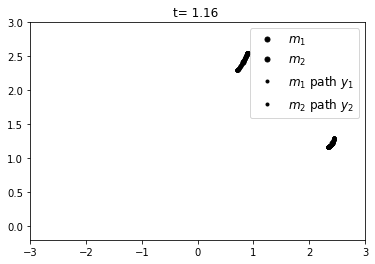

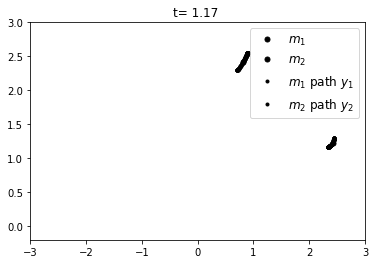

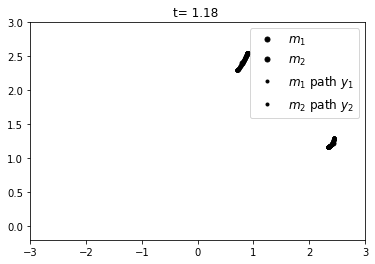

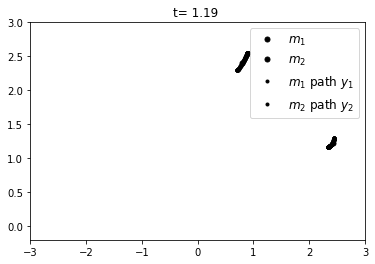

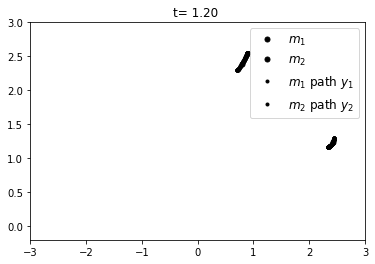

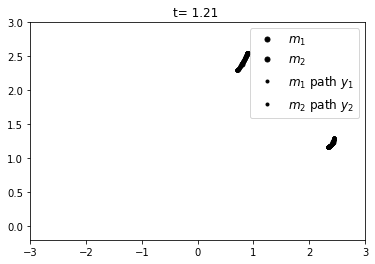

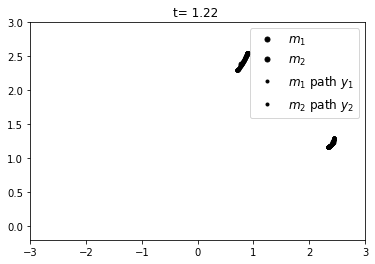

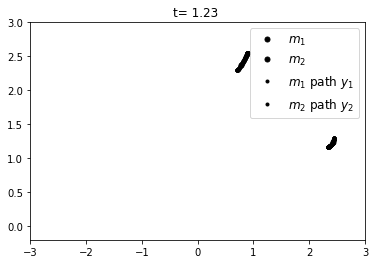

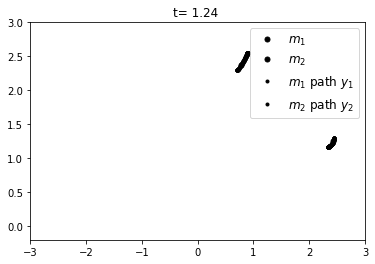

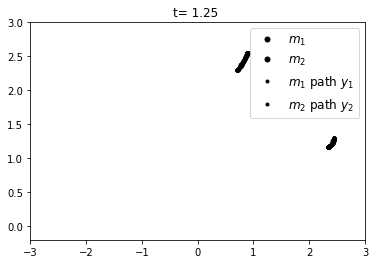

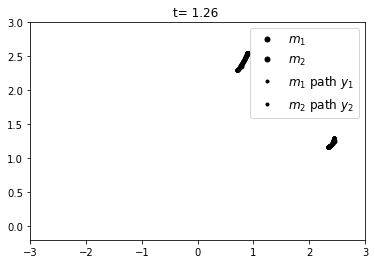

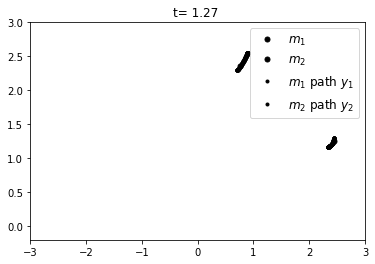

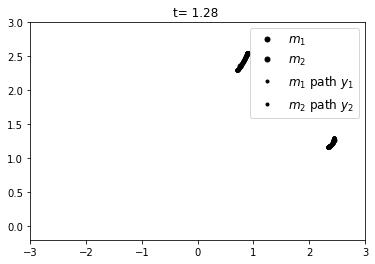

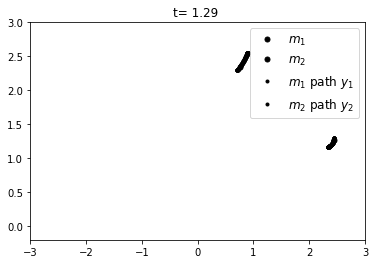

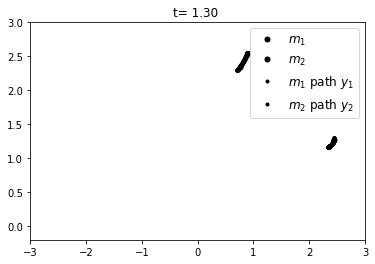

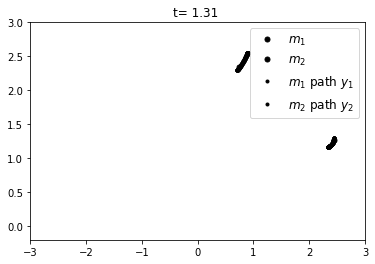

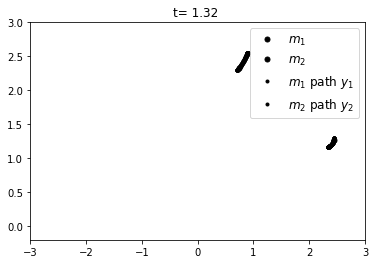

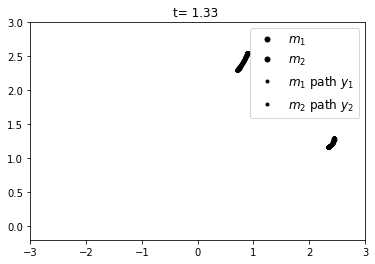

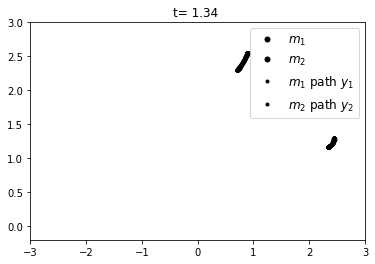

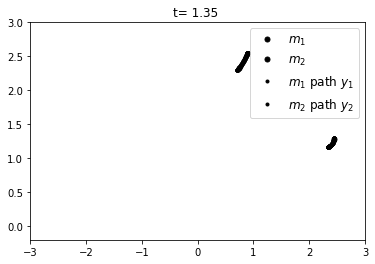

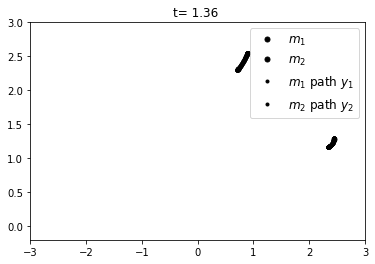

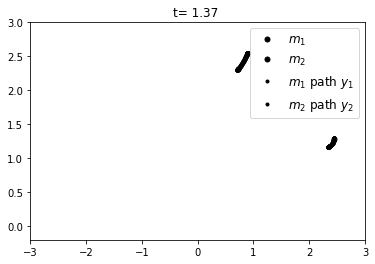

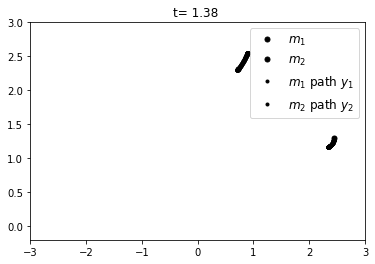

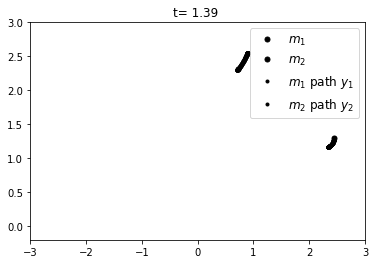

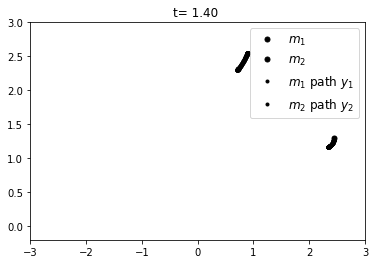

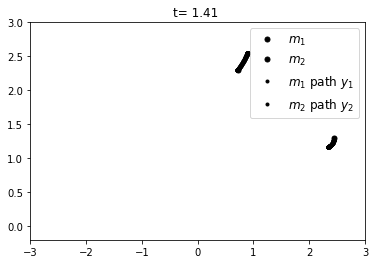

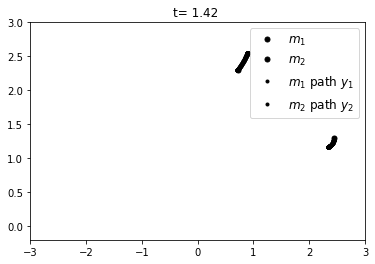

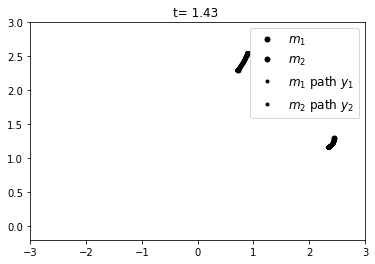

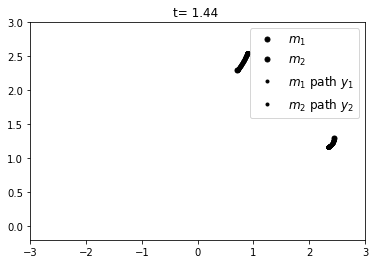

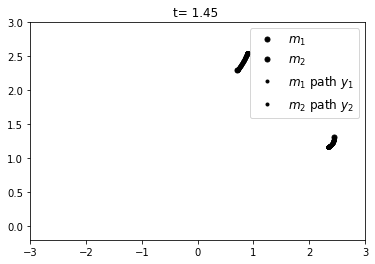

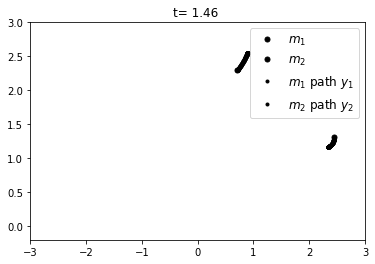

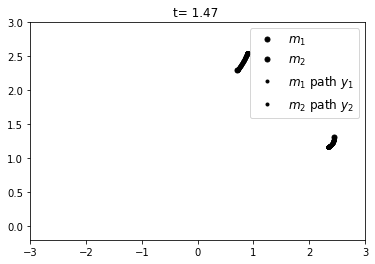

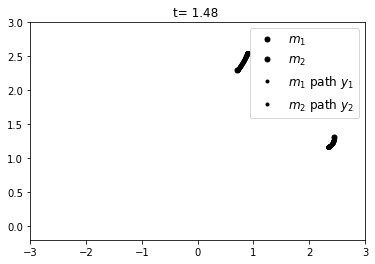

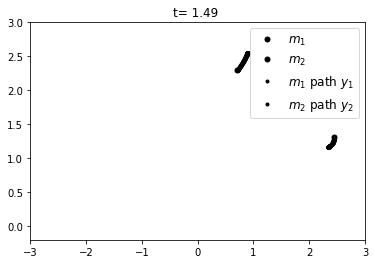

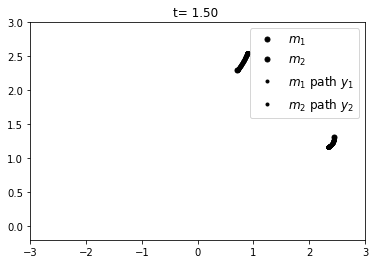

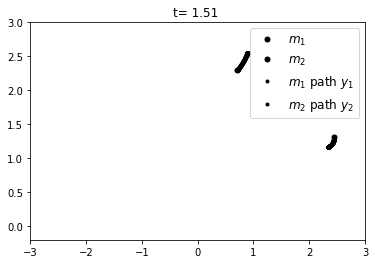

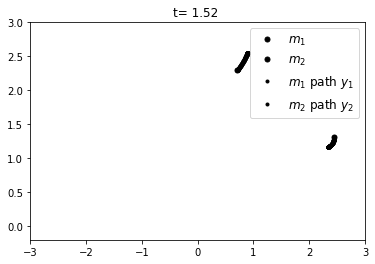

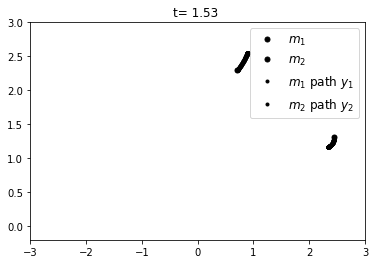

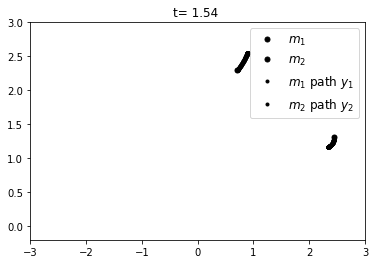

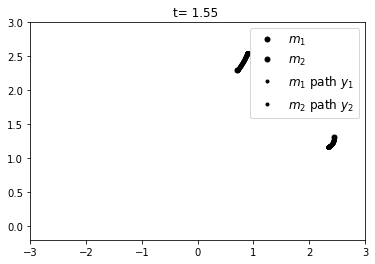

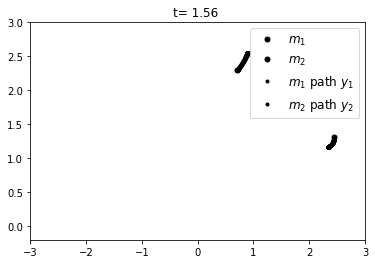

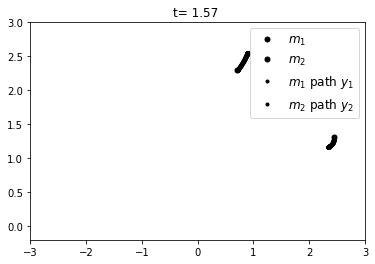

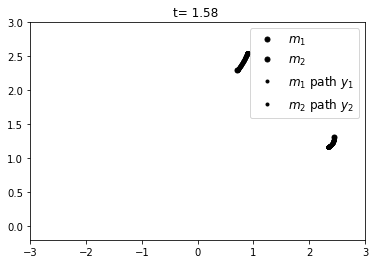

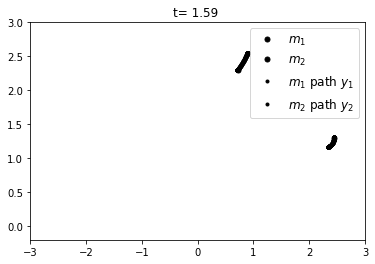

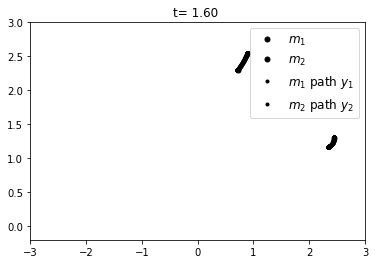

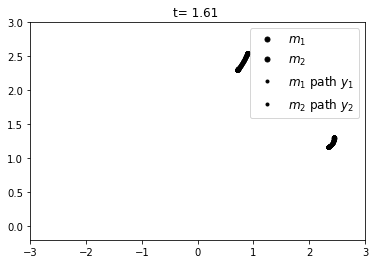

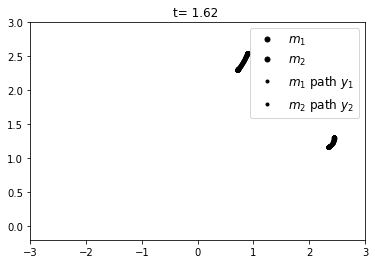

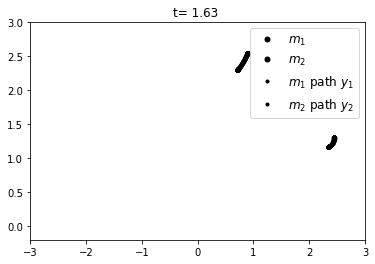

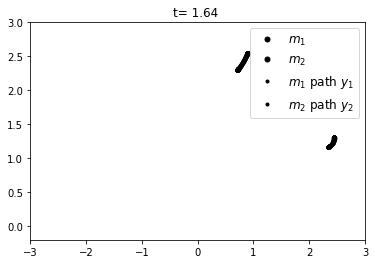

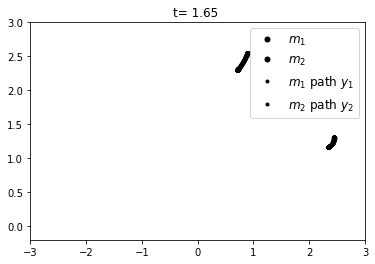

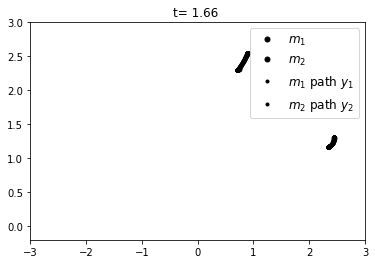

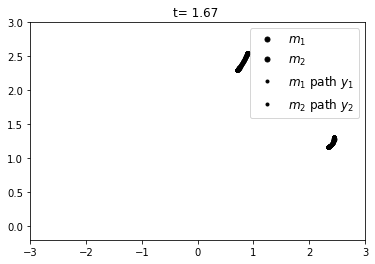

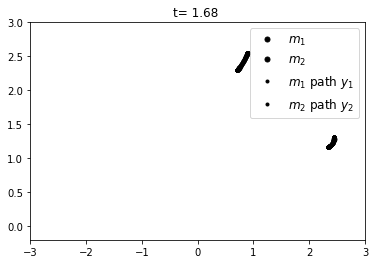

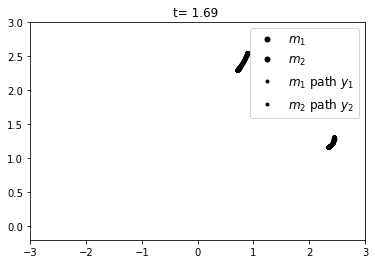

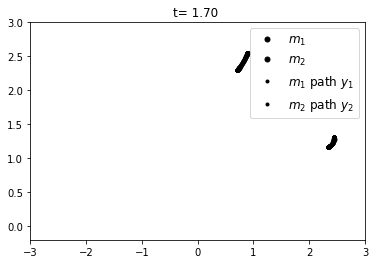

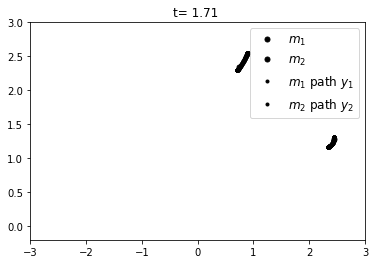

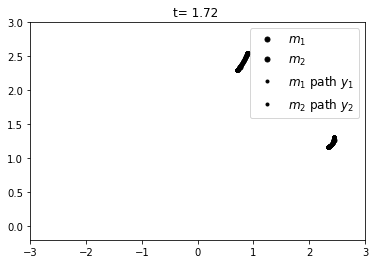

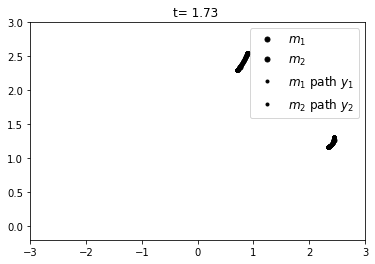

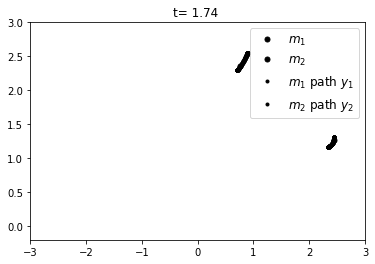

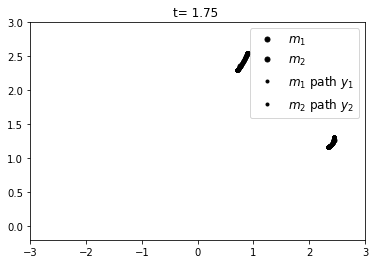

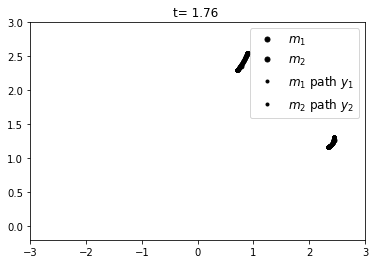

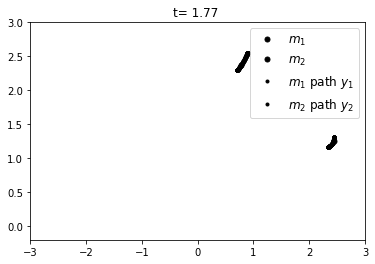

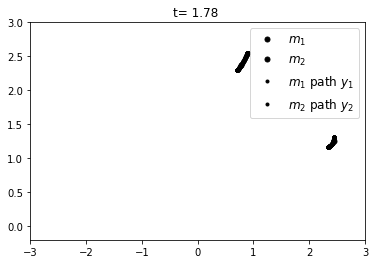

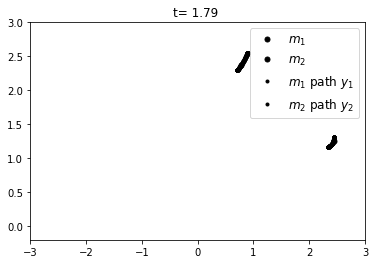

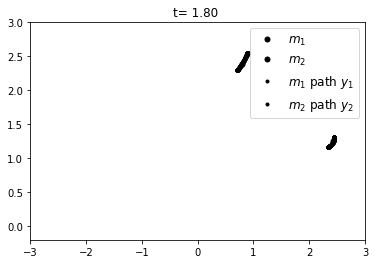

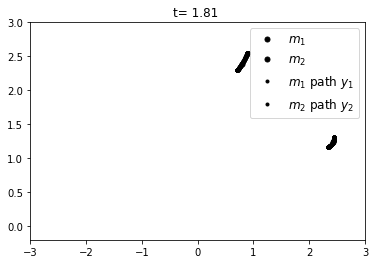

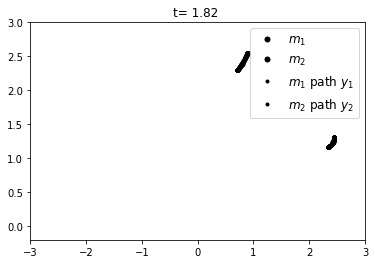

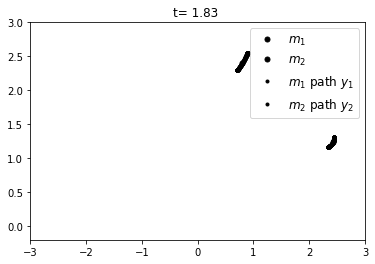

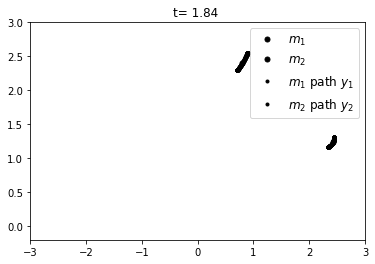

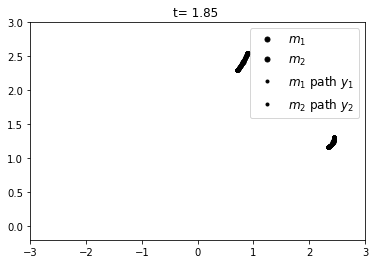

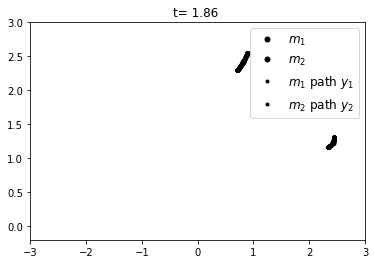

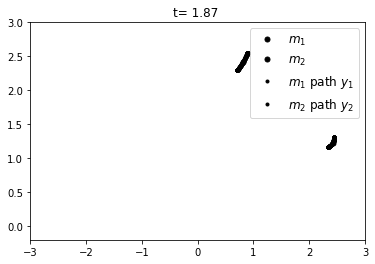

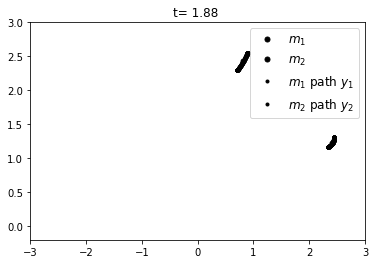

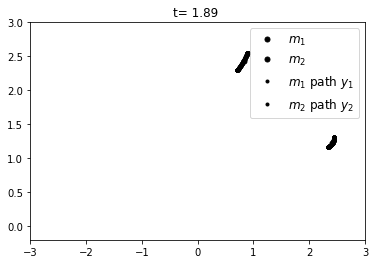

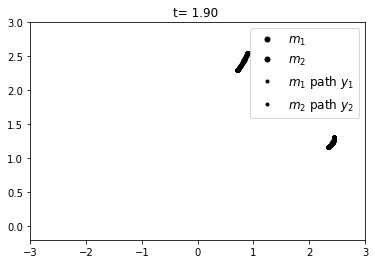

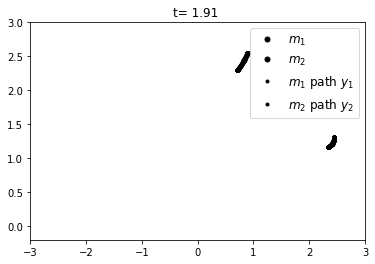

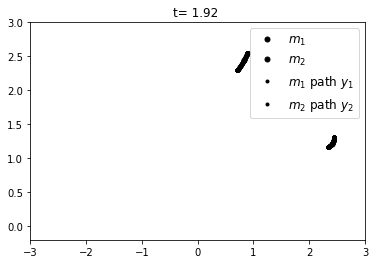

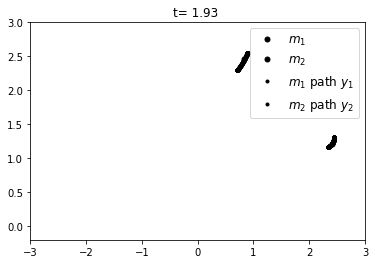

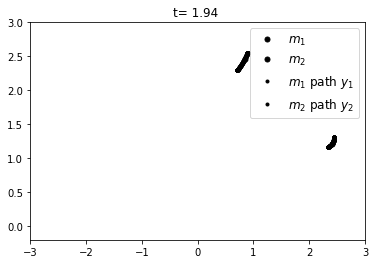

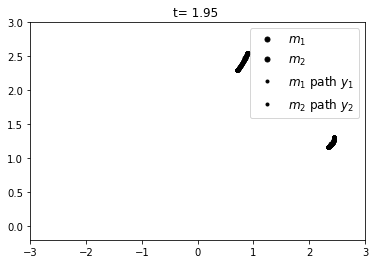

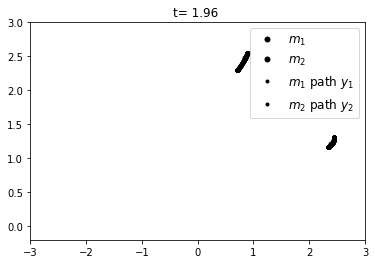

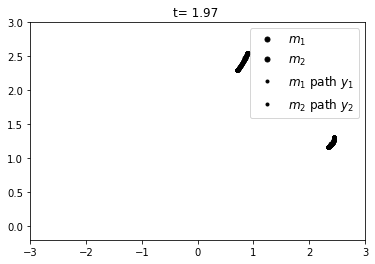

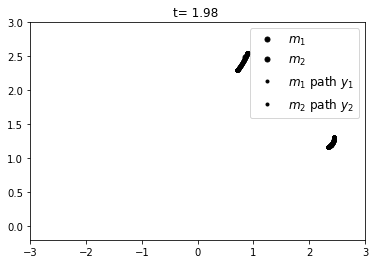

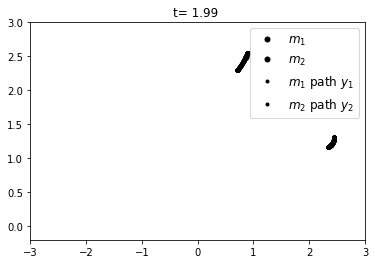

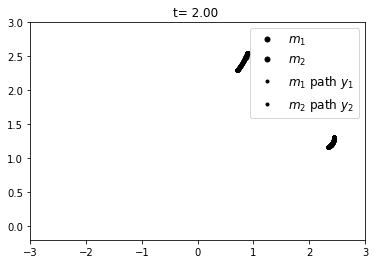

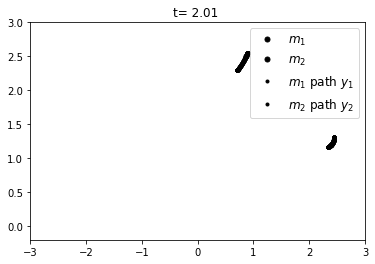

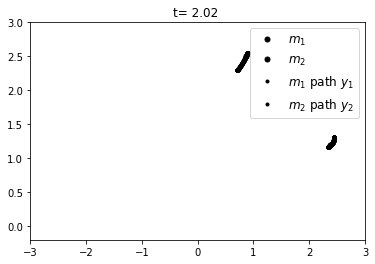

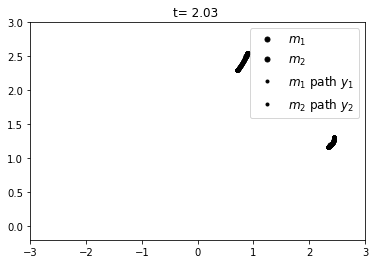

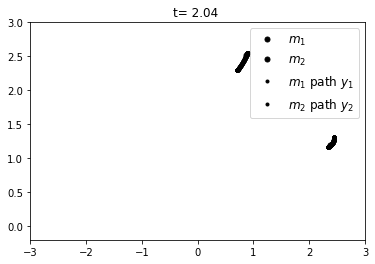

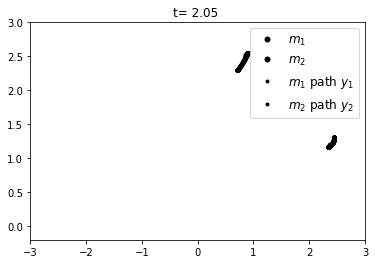

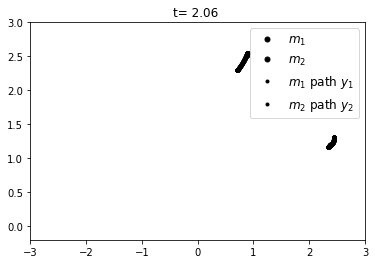

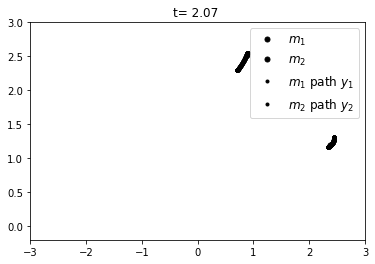

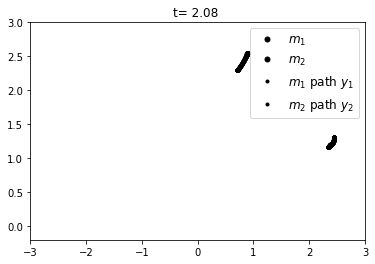

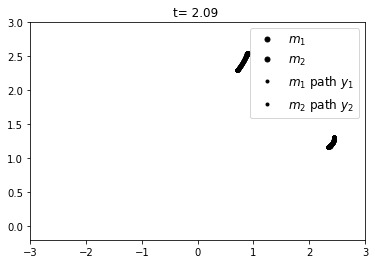

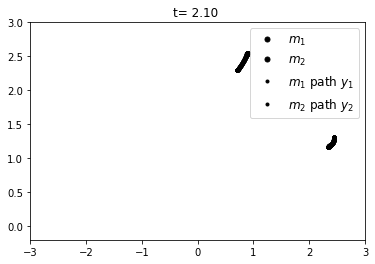

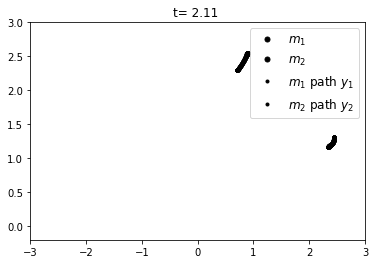

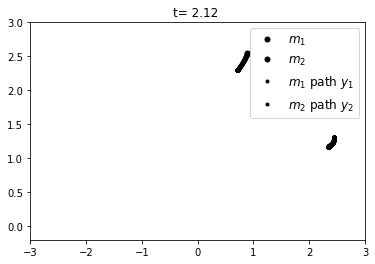

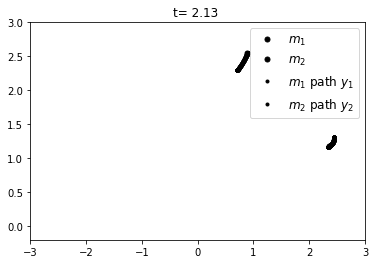

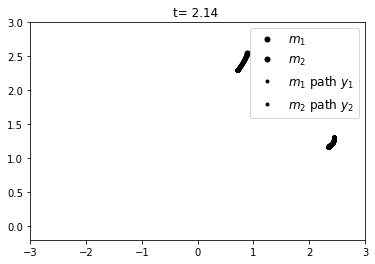

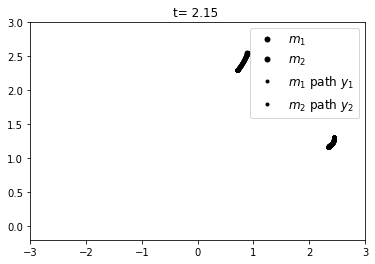

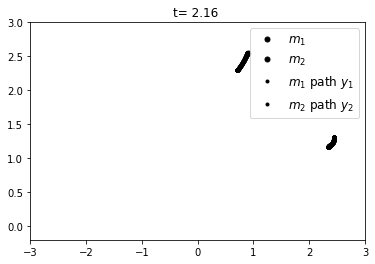

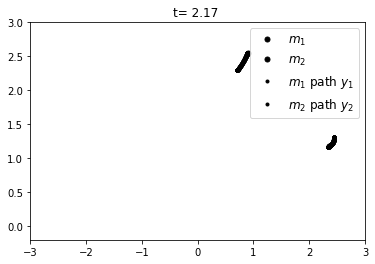

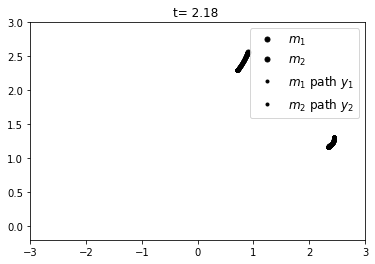

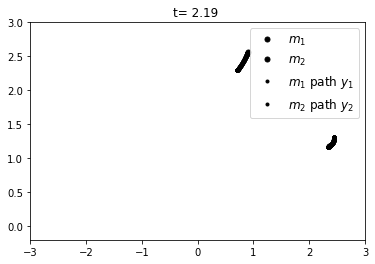

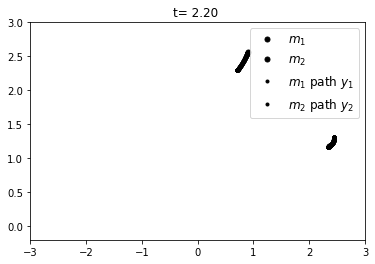

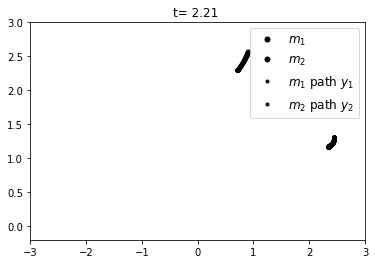

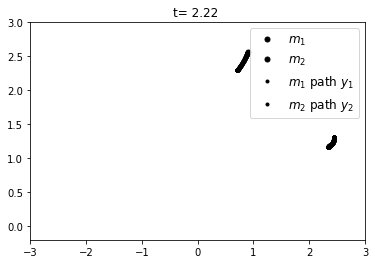

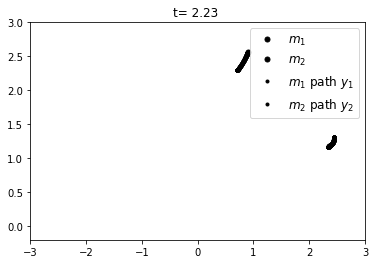

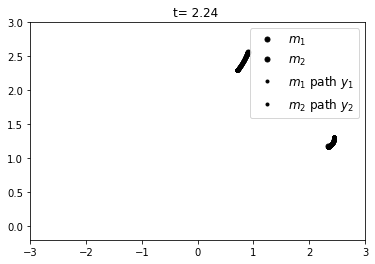

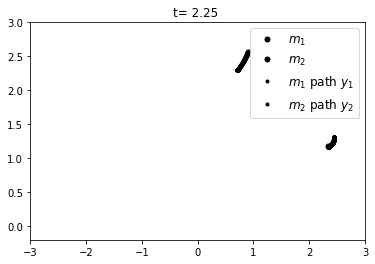

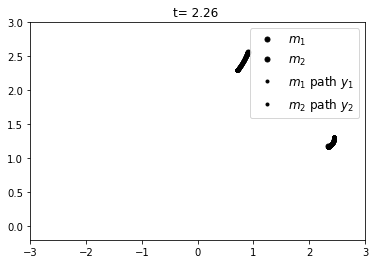

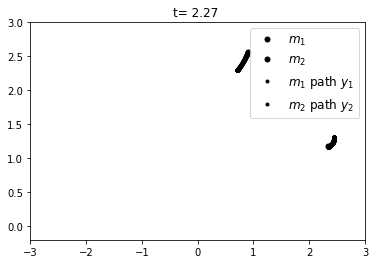

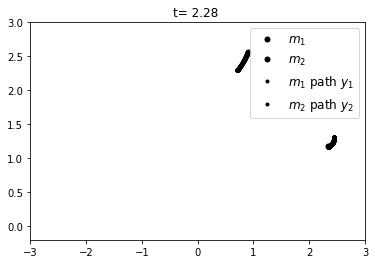

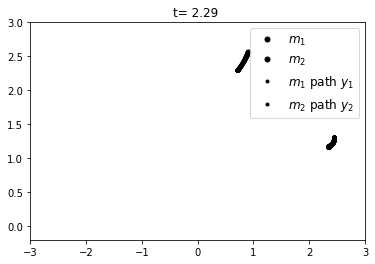

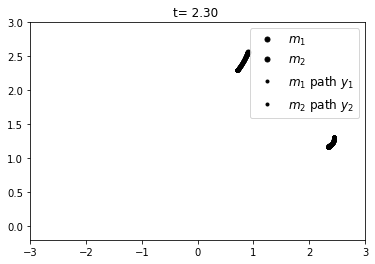

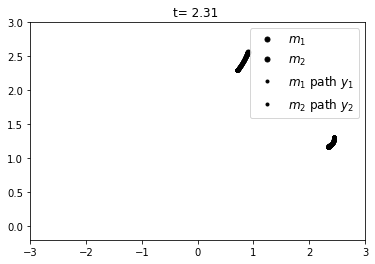

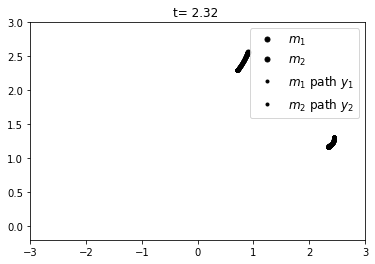

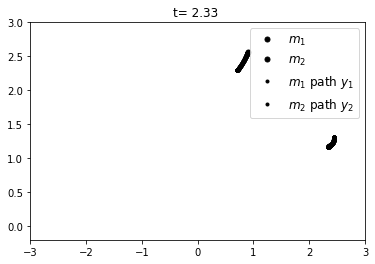

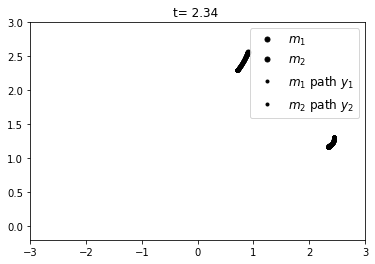

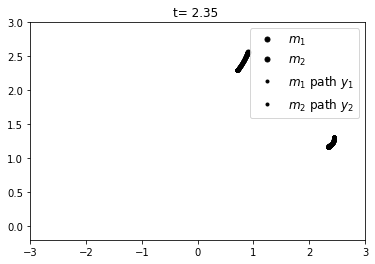

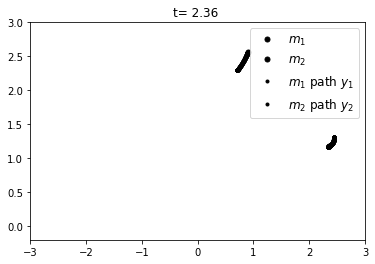

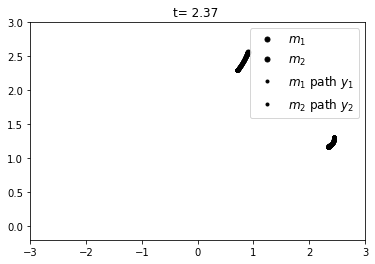

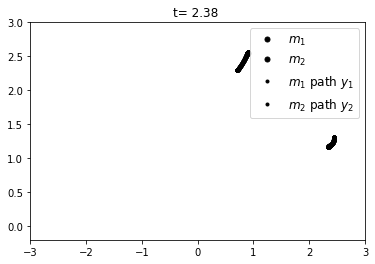

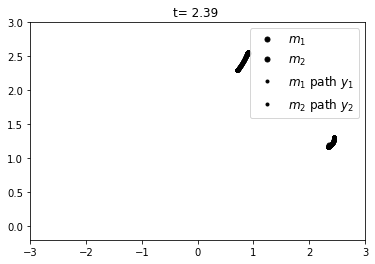

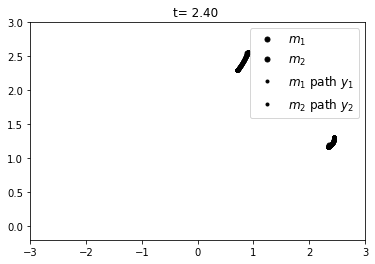

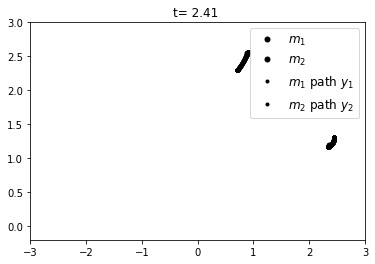

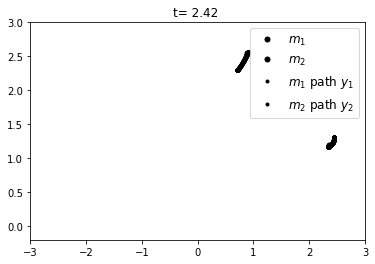

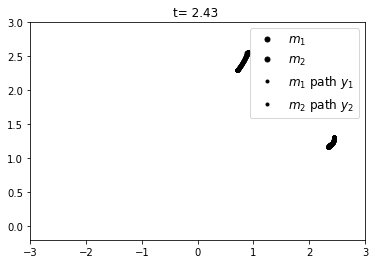

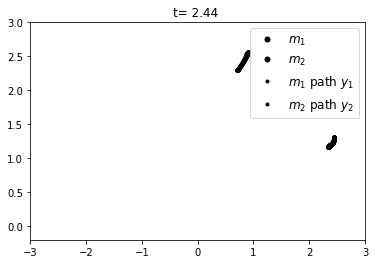

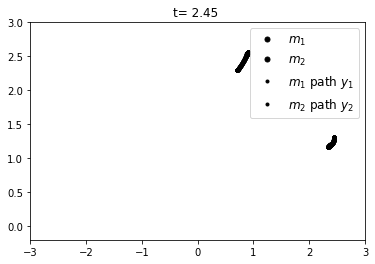

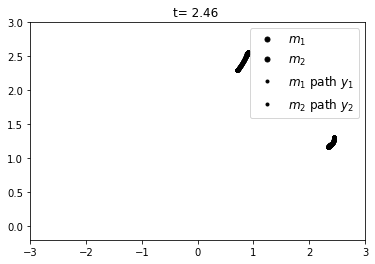

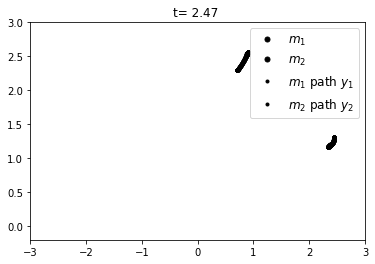

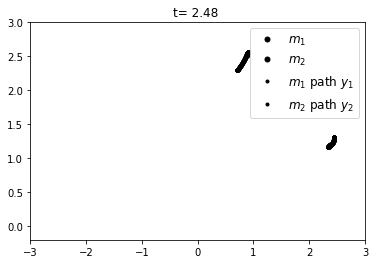

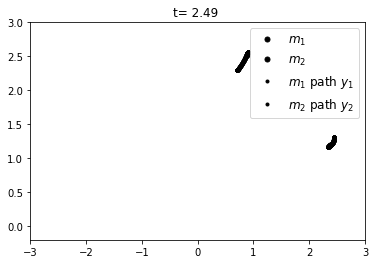

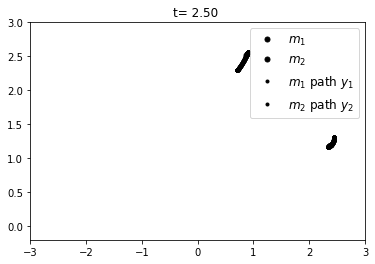

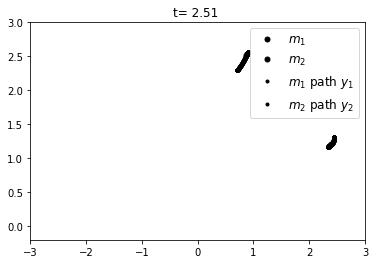

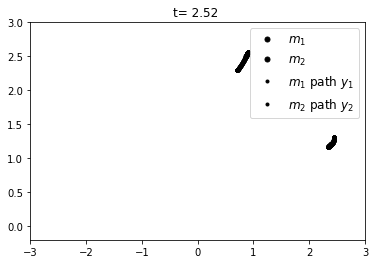

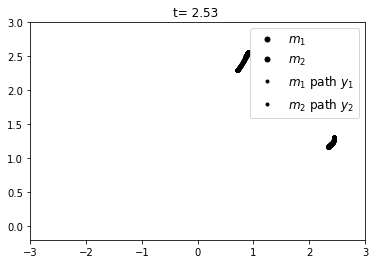

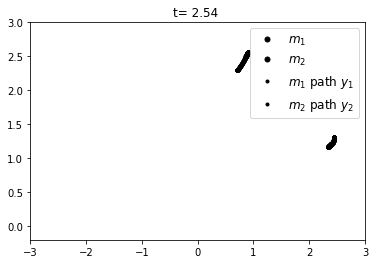

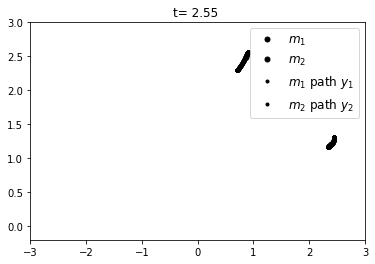

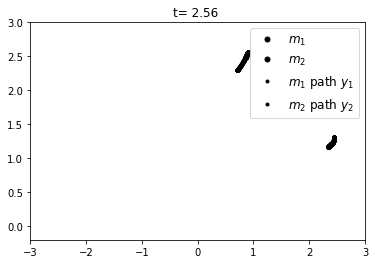

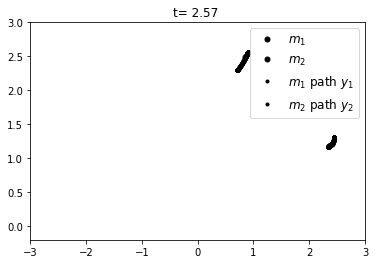

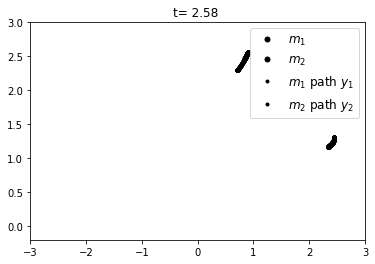

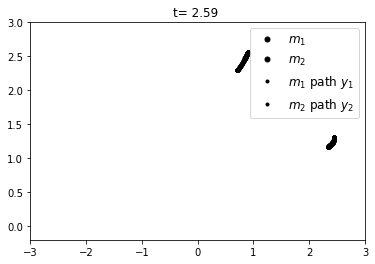

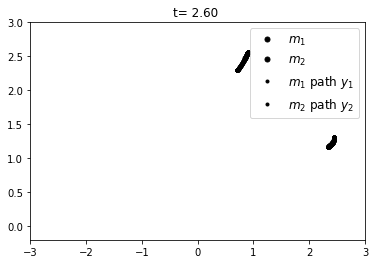

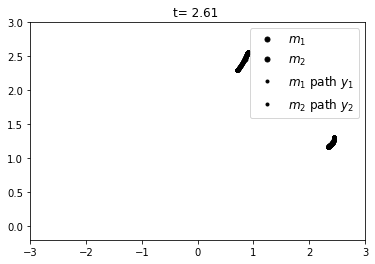

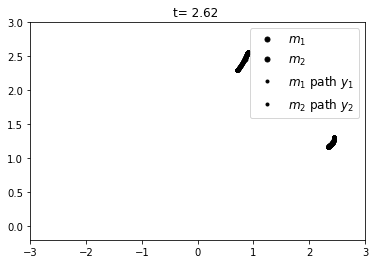

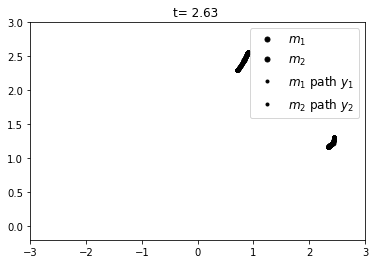

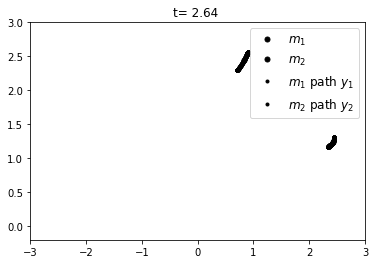

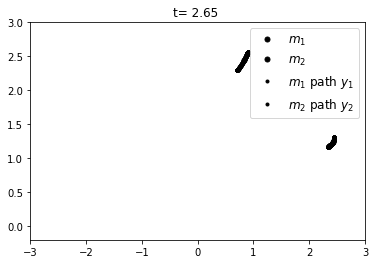

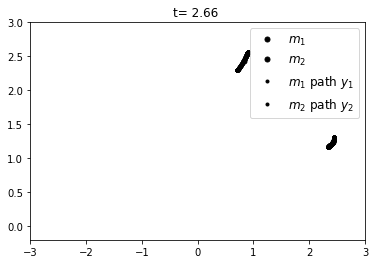

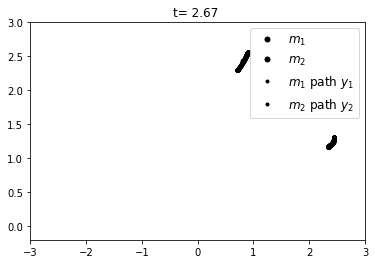

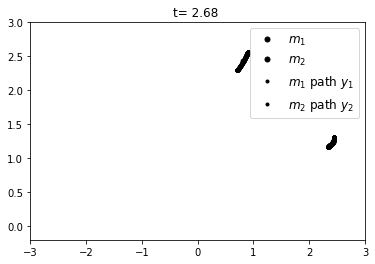

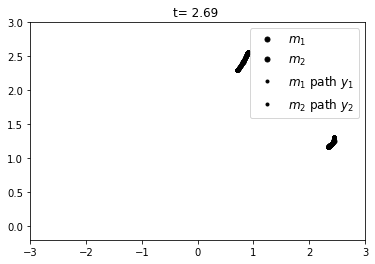

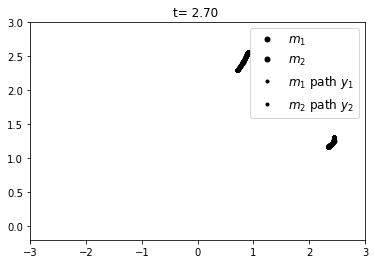

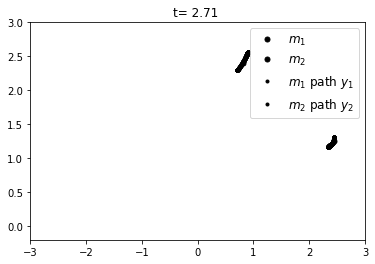

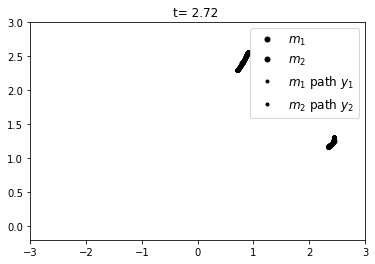

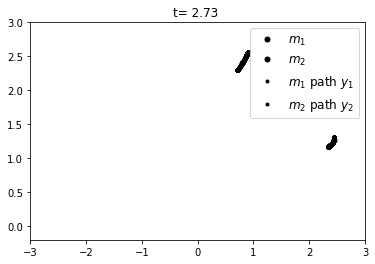

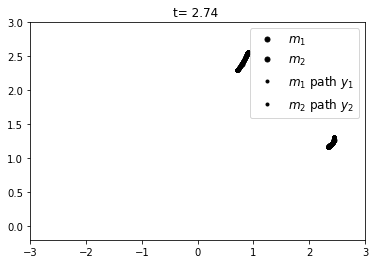

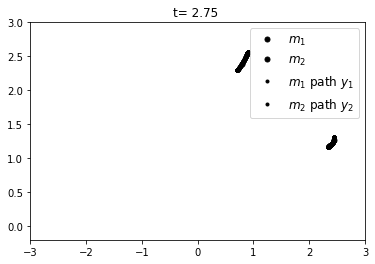

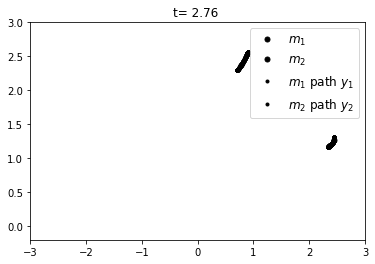

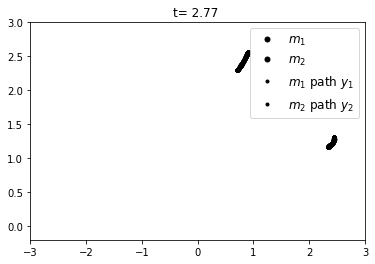

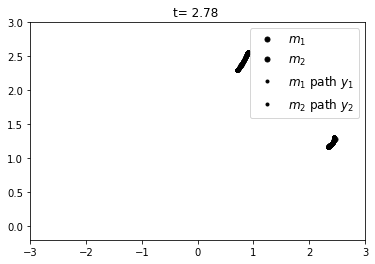

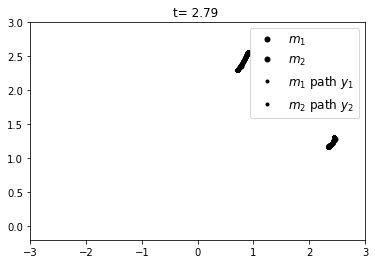

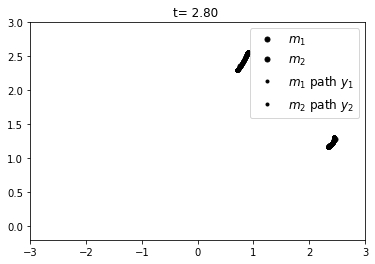

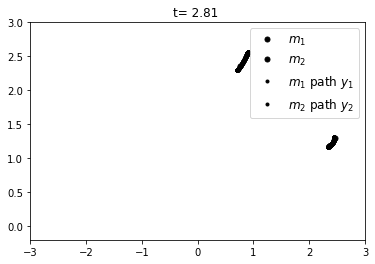

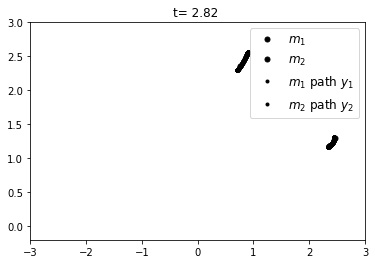

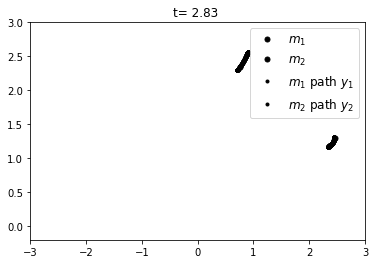

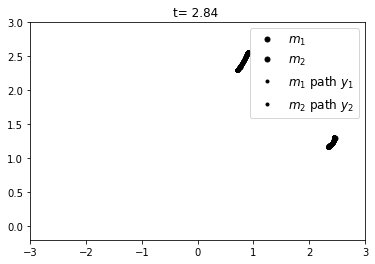

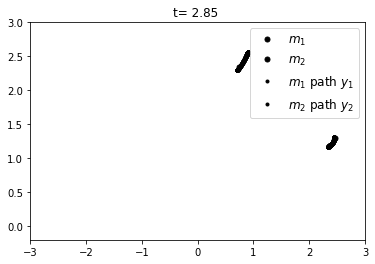

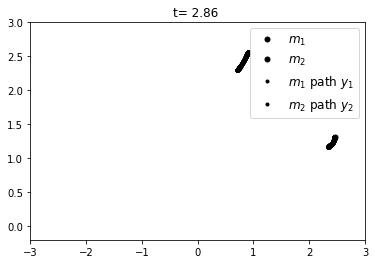

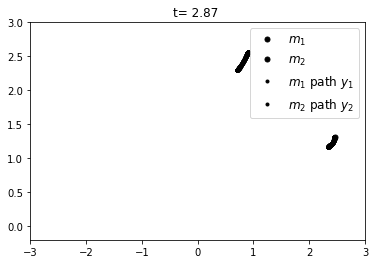

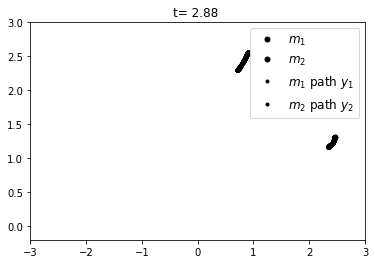

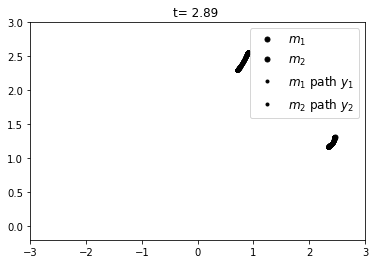

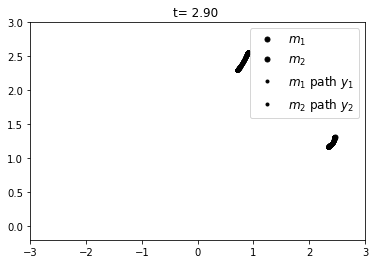

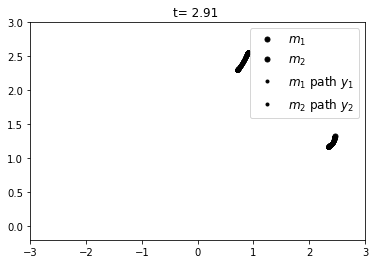

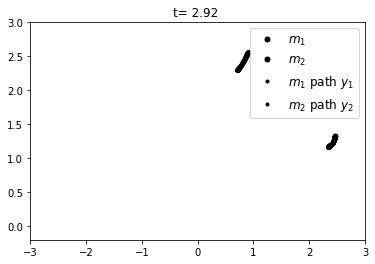

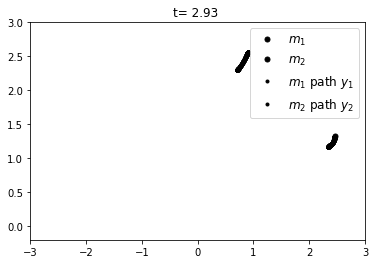

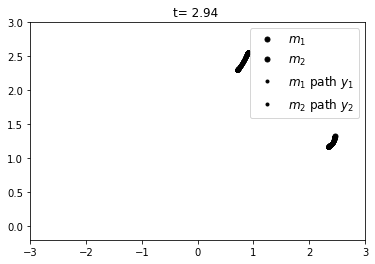

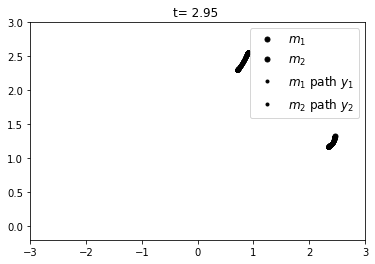

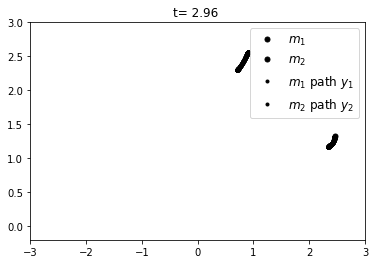

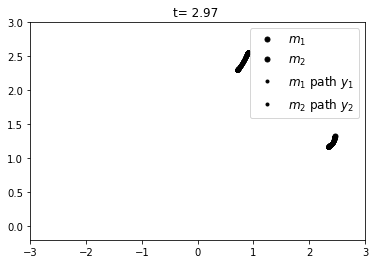

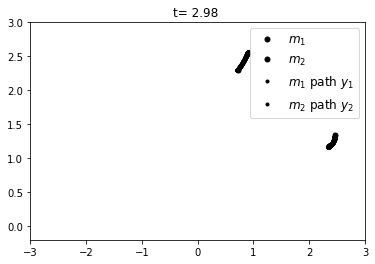

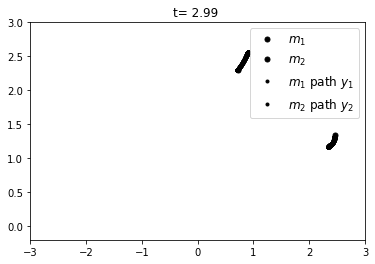

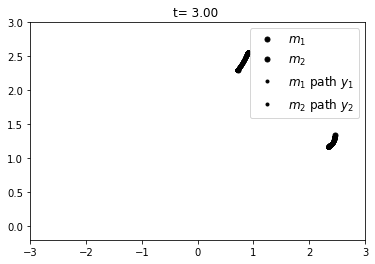

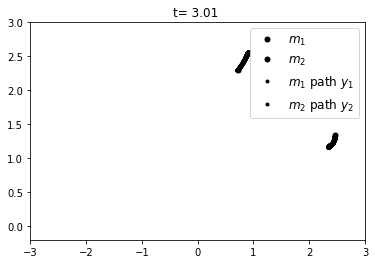

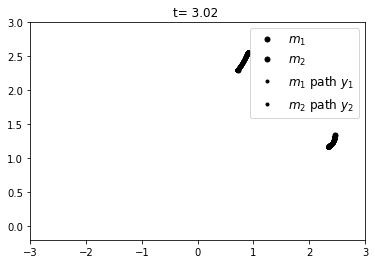

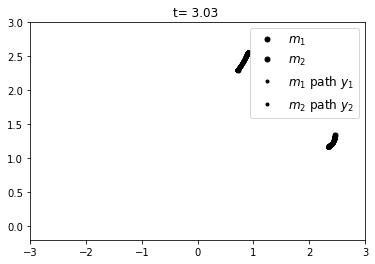

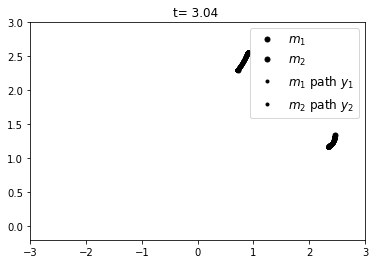

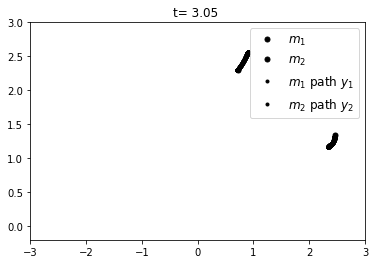

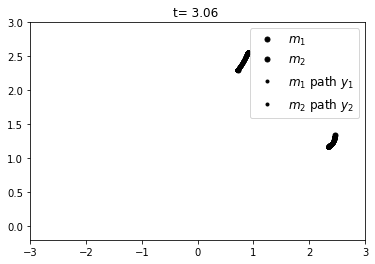

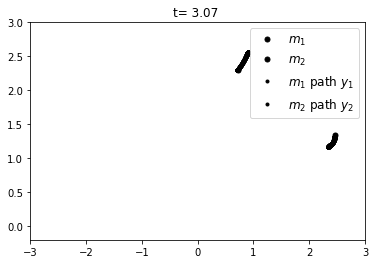

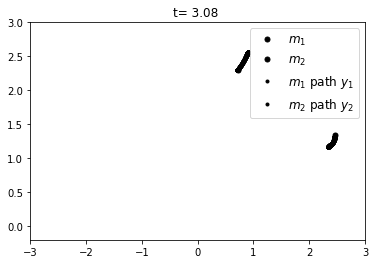

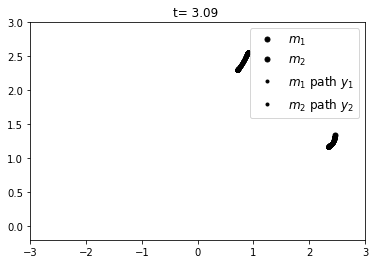

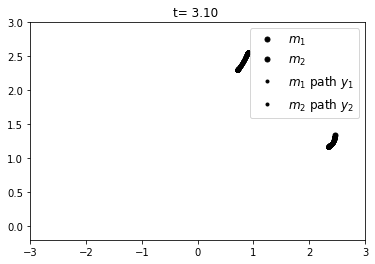

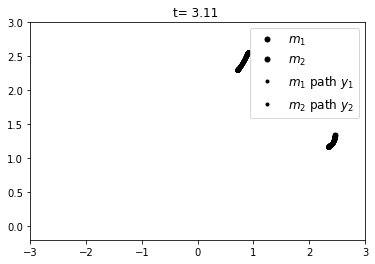

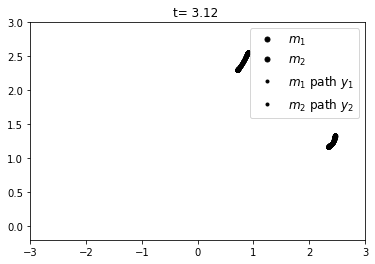

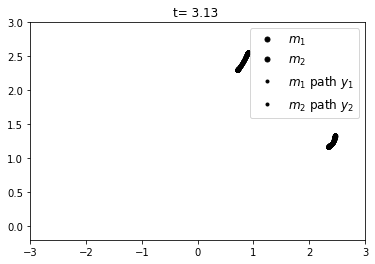

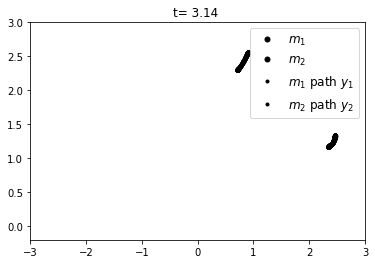

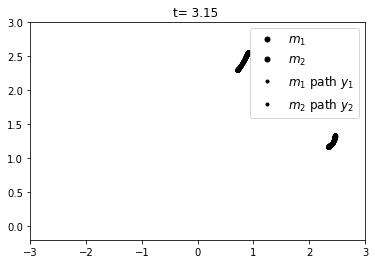

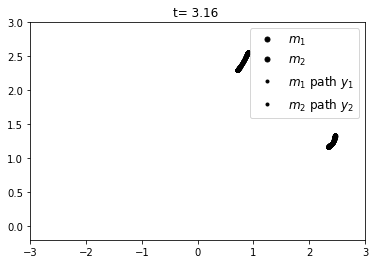

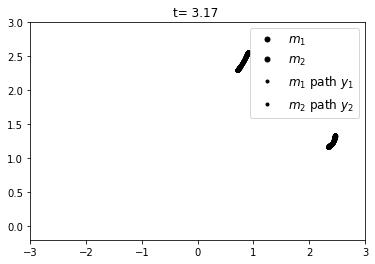

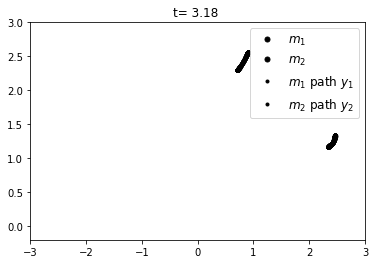

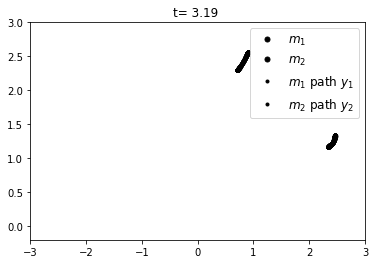

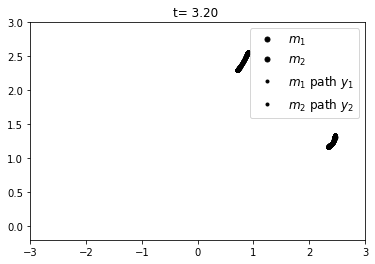

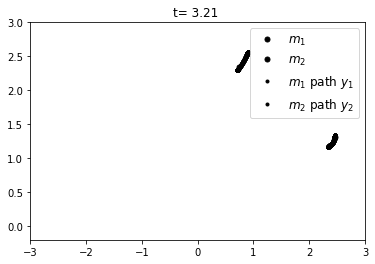

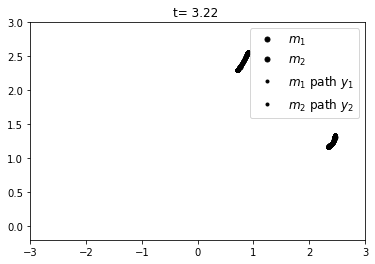

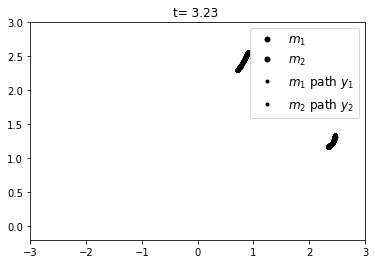

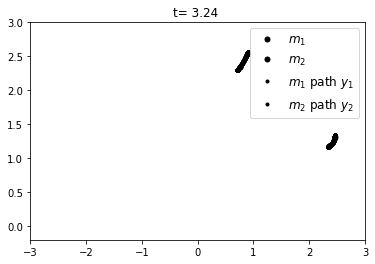

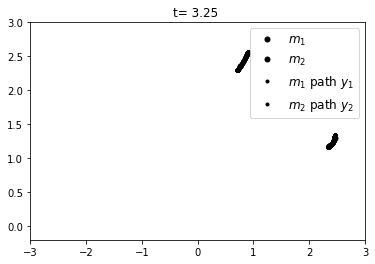

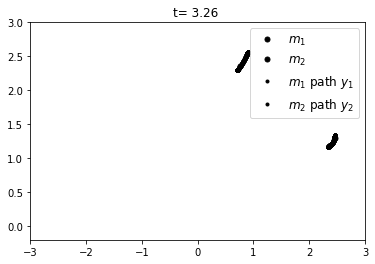

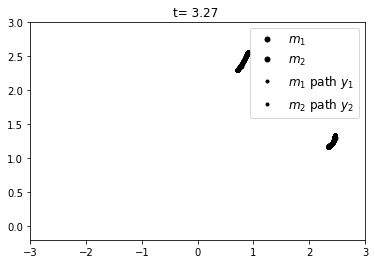

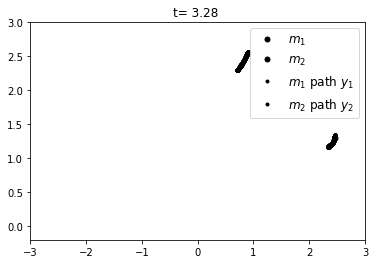

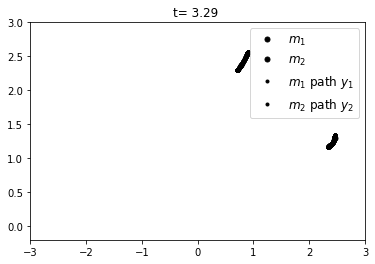

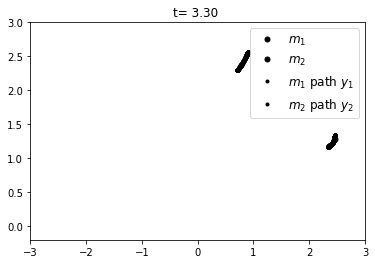

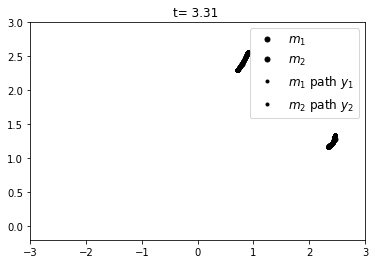

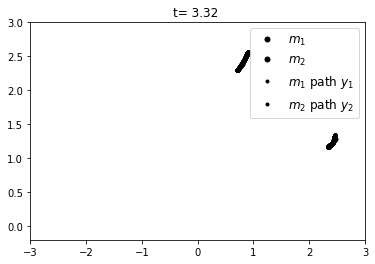

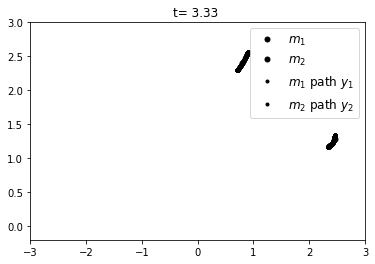

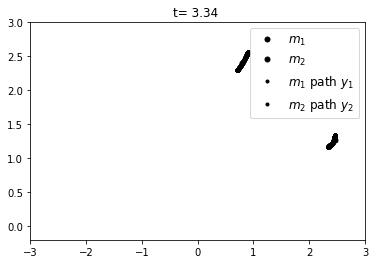

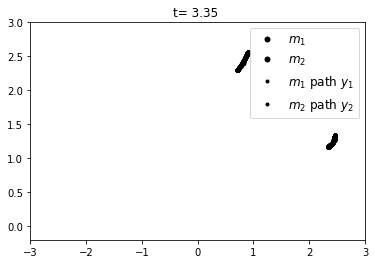

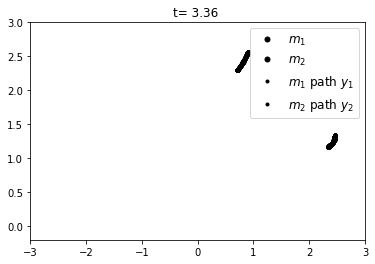

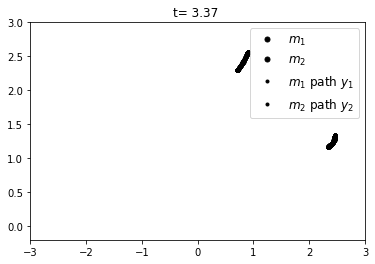

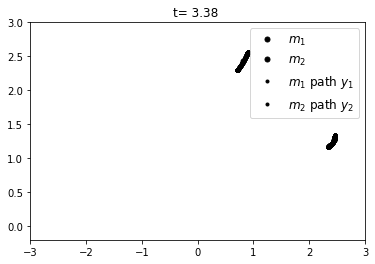

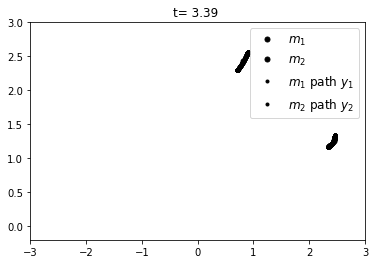

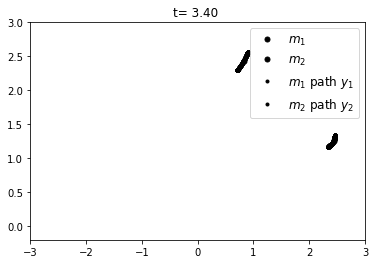

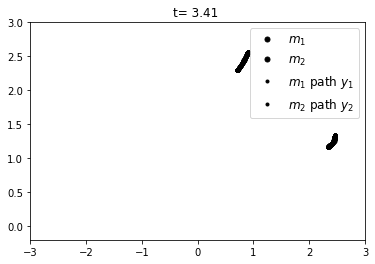

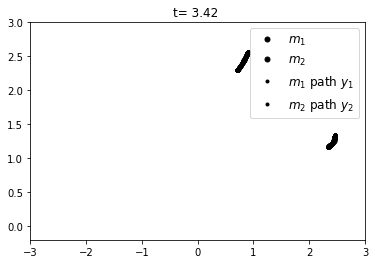

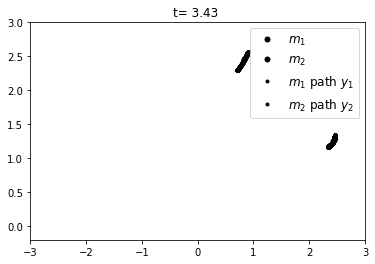

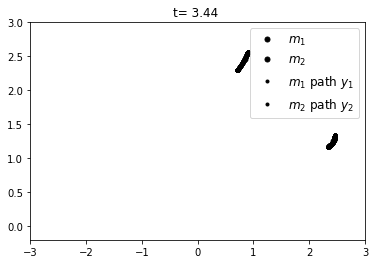

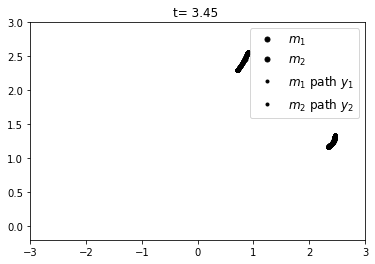

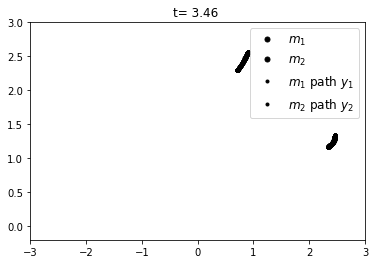

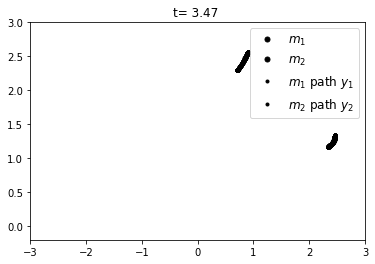

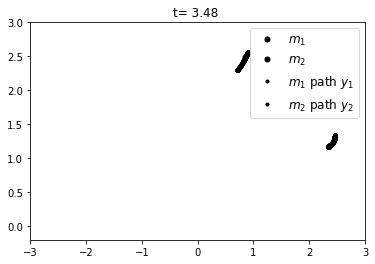

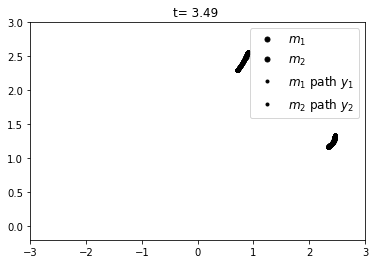

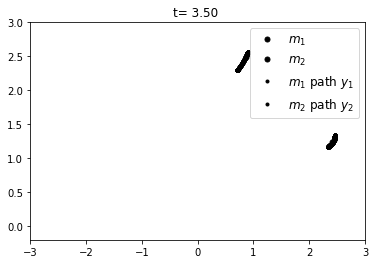

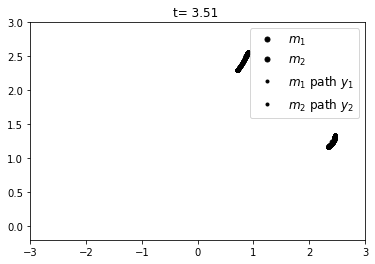

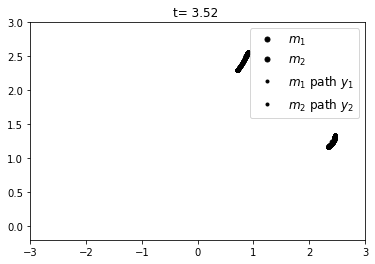

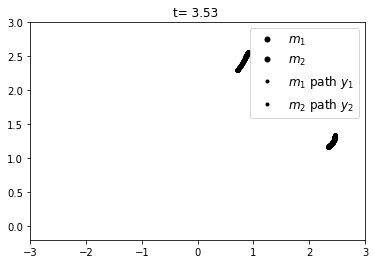

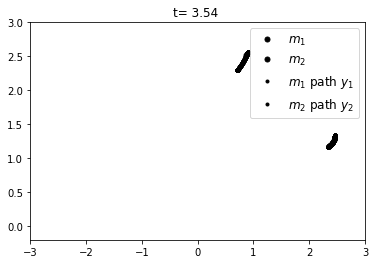

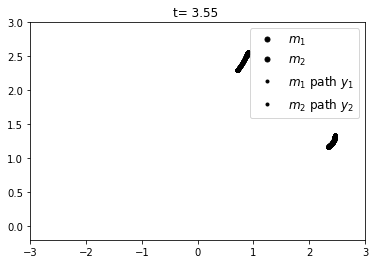

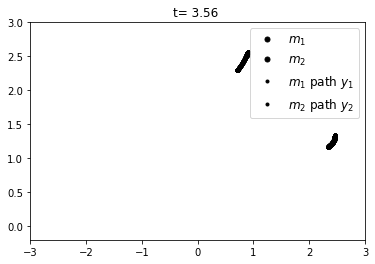

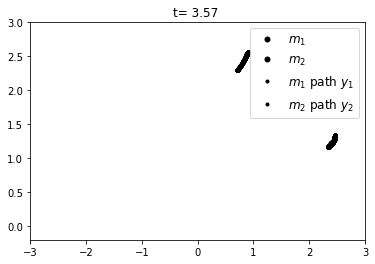

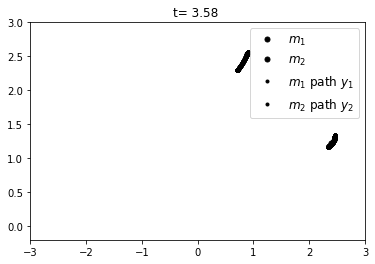

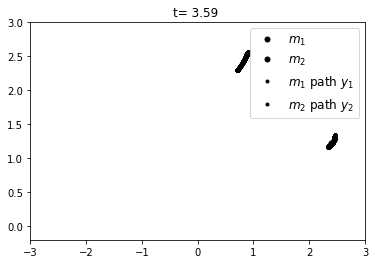

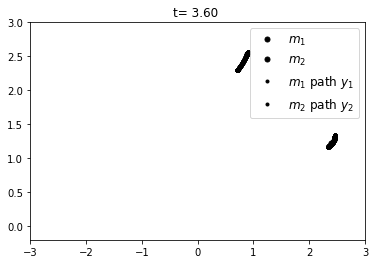

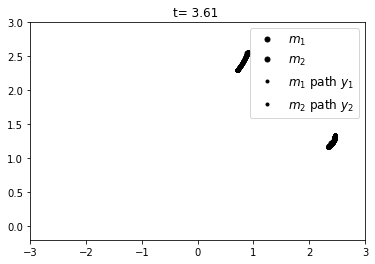

<Figure size 432x288 with 0 Axes>

In [49]:
def f2(pr,t,th1,th2,dth1dt,dth2dt):
    m1,m2,l1,l2,g=pr
    alph=(m2*l2*np.cos(th1-th2))/((m1+m2)*l1)
    bet=(m2*l2*dth2dt**2*np.sin(th1-th2)+(m1+m2)*g*np.sin(th1))/((m1+m2)*l1)    
    return (bet*l1*np.cos(th1-th2)+l1*dth1dt**2*np.sin(th1-th2)-g*np.sin(th2))/(l2-alph*l1*np.cos(th1-th2))
def f1(pr,t,th1,th2,dth1dt,dth2dt):
    m1,m2,l1,l2,g=pr
    alph=(m2*l2*np.cos(th1-th2))/((m1+m2)*l1)
    bet=(m2*l2*dth2dt**2*np.sin(th1-th2)+(m1+m2)*g*np.sin(th1))/((m1+m2)*l1) 
    return -alph*f2(pr,t,th1,th2,dth1dt,dth2dt)
m1,m2,l1,l2,g=1,2,1,2,9.8
pr=[m1,m2,l1,l2,g]
t=0
th10=0.785
th20=1.05
dth1dt=0
dth2dt=0
dt=0.01
T=3.612
tt,[th1,ddy1dx,dd2y1dx2],[th2,ddy2dx,dd2y2dx2]=coupRK4_2D(f1,f2,pr,pr,t,th10,th20,dth1dt,dth2dt,dt,T)
tt=np.asarray(tt)
th1=np.asarray(th1)
th2=np.asarray(th2)
x1=l1*np.sin(th1)
y1=l1*np.cos(th1)
x2=x1+l2*np.sin(th2)
y2=y1+l2*np.cos(th2)
y1=l1+l2-y1
y2=l1+l2-y2
plt.plot(tt,th1,label=r'$\theta_1$')
plt.plot(tt,th2,label=r'$\theta_2$')
plt.legend(loc='best',prop={'size':12})
plt.show()
for i in range(len(tt)):
    plt.title("t= %.2f "%tt[i])
    plt.axis([-3,3,-0.2,3])
    plt.plot(x1[i],y1[i],'k.',ms=10,label=r'$m_1$')
    plt.plot(x2[i],y2[i],'k.',ms=10,label=r'$m_2$')
    plt.plot(x1[:i],y1[:i],'k.',label=r'$m_1$ path $y_1$')
    plt.plot(x2[:i],y2[:i],'k.',label=r'$m_2$ path $y_2$')
    plt.legend(loc='best',prop={'size':12})
    plt.pause(0.005)
    plt.clf()
plt.show()
    

$\huge Initial~value~Problems~with~Scipy$

$odeint$

Examples

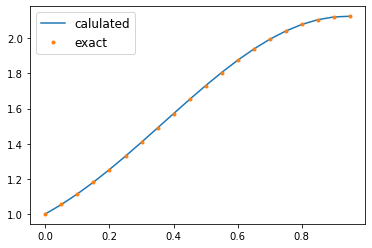

In [50]:
from scipy.integrate import*
import numpy as np
import matplotlib.pyplot as plt
def f(x,t):
    return np.cos(2*t)+np.sin(3*t)
x0=1
t=np.arange(0,1,0.05)
x=odeint(f,x0,t)
plt.plot(t,x,label='calulated')
xexc=0.5*np.sin(2*t)-(1/3)*np.cos(3*t)+(4/3)
plt.plot(t,xexc,'.',label='exact')
plt.legend(loc='best',prop={'size':12})
plt.show()



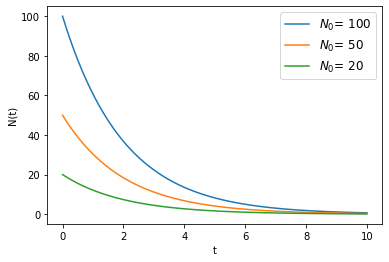

In [51]:
def f(t,y):
    return -0.5*y
t0=0
T=10
dt=0.01
t=np.arange(t0,T,dt)
y0=[100,50,20]
x=solve_ivp(f,[t0,T],y0,t_eval=t)
plt.plot(t,x.y[0],label=r'$N_0$= 100')
plt.plot(t,x.y[1],label=r'$N_0$= 50')
plt.plot(t,x.y[2],label=r'$N_0$= 20')
plt.legend(loc='best',prop={'size':12})
plt.xlabel('t')
plt.ylabel('N(t)')
plt.show()

Exercises

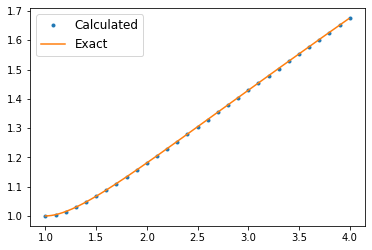

In [52]:
def f(pr,t,y):
    return (y/t)-(y/t)**2
pr=None
t=1
y=1
dt=0.01
T=4
def exc(t):
    return t/(1+np.log(t))
tt,yy,ddydx=Euler1D(f,pr,t,y,dt,T)
plt.plot(tt,yy,'.',markevery=10,label='Calculated')
tt=np.arange(1,4,0.01)
plt.plot(tt,exc(tt),label='Exact')
plt.legend(loc='best',prop={'size':12})
plt.show()

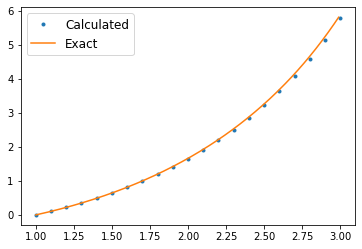

In [53]:
def f(pr,t,y):
    return 1+(y/t)+(y/t)**2
pr=None
t=1
y=0
dt=0.01
T=3
tt,yy,ddydx=Euler1D(f,pr,t,y,dt,T)
plt.plot(tt,yy,'.',markevery=10,label='Calculated')
tt=np.arange(t,T,dt)
plt.plot(tt,(tt*np.tan(np.log(tt))),label='Exact')
plt.legend(loc='best',prop={'size':12})
plt.show()

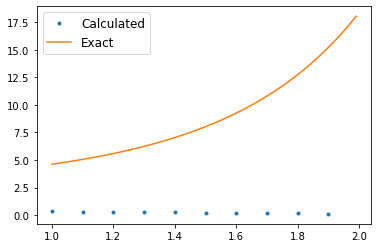

In [54]:
from math import*
def f(pr,t,y):
    return (t+2*t**3)*y**3-t*y
pr=None
t=1
y=1/3
dt=0.01
T=2
tt,yy,ddydx=Euler1D(f,pr,t,y,dt,T)
plt.plot(tt,yy,'.',markevery=10,label='Calculated')
tt=np.arange(t,T,0.01)
plt.plot(tt,(3+2*tt**2+6*np.exp(tt**2))**0.5,label='Exact')
plt.legend(loc='best',prop={'size':12})
plt.show()

In [55]:
from scipy.misc import*
from dfdx3 import*
from math import*
def E(pr,t):
    pr=None
    return exp(0.06*pi*t)*sin(2*t-pi)
def f(pr,t,I):
    dEdt=dfdx3(E,pr,t,1e-5)
    d2Edt2=derivative(E,t,0.1,n=2,args=(pr),order=3)
    #pr=[C,R,L]
    C,R,L=pr
    return C*d2Edt2+(1/R)*dEdt+(1/L)*E
C,R,L=0.3,1.4,1.7
pr=[C,R,L]
t=0
I=0
dt=0.1
T=10
tt,yy,ddydx=Euler1D(f,pr,t,I,dt,T)
print(yy)

TypeError: E() takes 2 positional arguments but 4 were given

Population after 5 years :  58.91565593283595


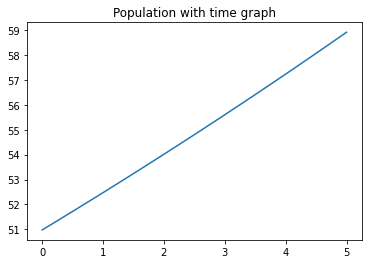

In [57]:
def f(pr,t,P):
    #pr=[b,k]
    b,k=pr
    return b*P-k*P**2
t=0
P=50.976
b=2.9e-2
k=1.4e-7
pr=[b,k]
T=5
tt,PP,ddydx=Euler1D(f,pr,t,P,dt,T)
n=len(PP)
print('Population after 5 years : ',PP[n-1])
plt.plot(tt,PP)
plt.title("Population with time graph")
plt.show()

In [60]:
def coupEuler_3D(f1,f2,f3,pr1,pr2,pr3,x,y1,y2,y3,dx,X):
    xx=[]
    yy1=[]
    yy2=[]
    yy3=[]
    ddy1dx=[]
    ddy2dx=[]
    ddy3dx=[]
    while abs(x)<abs(X):
        xx.append(x)
        dy1dx=f1(pr1,x,y1,y2,y3)   
        yy1.append(y1)
        ddy1dx.append(dy1dx)
        dy2dx=f2(pr2,x,y1,y2,y3)
        yy2.append(y2)
        ddy2dx.append(dy2dx)
        dy3dx=f3(pr3,x,y1,y2,y3)
        yy3.append(y3)
        ddy3dx.append(dy3dx)
        y1=y1+dx*dy1dx
        y2=y2+dx*dy2dx
        y3=y3+dx*dy3dx
        x=x+dx
    return xx,[yy1,ddy1dx],[yy2,ddy2dx],[yy3,ddy3dx]

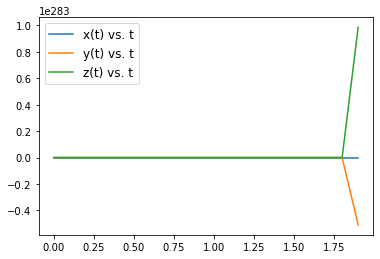

In [70]:
def f1(pr1,t,x,y,z):
    return pr1*(y-x)
def f2(pr2,t,x,y,z):
    return x*(pr2-z)-y
def f3(pr3,t,x,y,z):
    return x*y-pr3*z

t=0
x=0
y=1
z=0
pr1=10
pr2=28
pr3=(8/3)
dt=0.1
T=2
tt,[xx,ddy1dx],[yy,ddy2dx],[zz,ddy3dx]=coupEuler_3D(f1,f2,f3,pr1,pr2,pr3,t,x,y,z,dt,T)
plt.plot(tt,xx,label='x(t) vs. t')
plt.plot(tt,yy,label='y(t) vs. t')
plt.plot(tt,zz,label='z(t) vs. t')
plt.legend(loc='best',prop={'size':12})
plt.show()

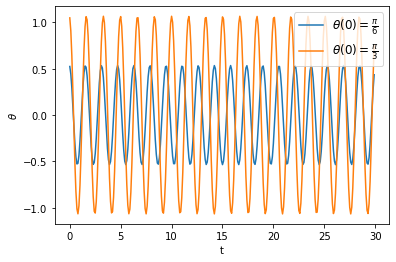

In [75]:
def f(pr,t,th,dthdt):
    #pr=g_l
    g_l=pr
    return -g_l*np.sin(th)
t=0
th=np.pi/6
dthdt=0
g=32.17
l=2
g_l=g/l
pr=g_l
dt=0.1
T=30
tt,th,ddydx,dd2ydx2=Euler2D(f,pr,t,th,dthdt,dt,T)  
plt.plot(tt,th,label=r"$\theta(0) = \frac{\pi}{6}$")

th=np.pi/3
dthdt=0
tt,th,ddydx,dd2ydx2=Euler2D(f,pr,t,th,dthdt,dt,T)  
plt.plot(tt,th,label=r"$\theta(0) = \frac{\pi}{3}$")
plt.legend(loc='best',prop={'size':12})
plt.xlabel('t')
plt.ylabel(r'$\theta$')
plt.show()

In [77]:
def RK3_1D(f,pr,x,y,dx,X):
    xx=[]
    yy=[]
    ddydx=[]
    while abs(x)<abs(X):
        k1=dx*f(pr,x,y)
        k2=dx*f(pr,x+(2/3)*dx,y+(2/3)*k1)
        k3=dx*f(pr,x+(2/3)*dx,y+(2/3)*k2)
        xx.append(x)
        yy.append(yy)
        
        dy=(1/8)*(2*k1+3*k2+3*k3)
        ddydx.append(dy/dx)
        y=y+dy
        x=x+dx
    return xx,yy,ddydx

$Duffing~Oscillator$

$\frac{d^2x}{dt^2}=\gamma ~cos~\omega t+\delta ~\frac{dx}{dt}+\alpha~x+\beta~x^3$

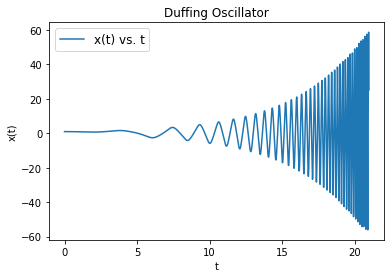

In [93]:
#pr=[alp,bet,gam,delt,omg]
#f(pr,x,y,dydx)
def f(pr,t,x,dxdt):
    alp,bet,gam,delt,omg=pr
    return gam*np.cos(omg*t)+delt*dxdt+alp*x+bet*x**3
alp,bet,gam,delt,omg=1,-1,-0.3,0.65,1.2
pr=[alp,bet,gam,delt,omg]
t=0
x=1
dxdt=0
dt=0.01
T=21
tt,xx,ddydx,ddy2dx2=RK4_2D(f,pr,t,x,dxdt,dt,T)
plt.plot(tt,xx,label='x(t) vs. t')
plt.xlabel('t')
plt.ylabel('x(t)')
plt.title("Duffing Oscillator")
plt.legend(loc='best',prop={'size':12})
plt.show()

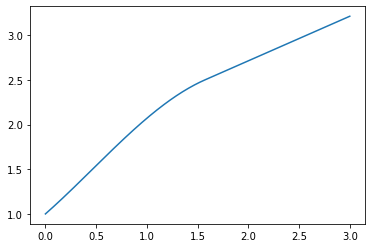

In [110]:
def U(pr,x):
    #pr=[k,b,d]
    k,b,d=pr
    if x<b-d:
        t=inf
    elif x>b+d:
        t=(k/2)*d**2
    else:
        t=(k/2)*(x-b)**2
    return t
def f(pr,t,x,dxdt):
    F=dfdx3(U,pr,x,1e-5)
    m=1
    return -F
k,b,d=1,1.5,1
pr=[k,b,d]
t=0
x=1
T=3
dxdt=1
tt,xx,ddydx,ddy2dx2=RK4_2D(f,pr,t,x,dxdt,dt,T)
plt.plot(tt,xx)

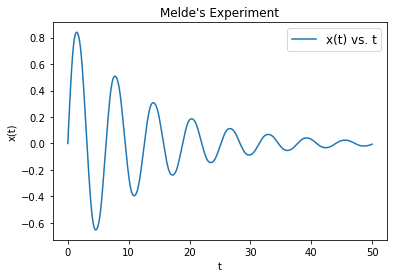

In [7]:
#pr=[alp,bet,gam,delt,omg]
#f(pr,x,y,dydx)
def f(pr,t,x,dxdt):
    a,b,c,f0,omg=pr
    return a*dxdt+b*x+c*x**3+f0*x*np.cos(2*omg*t)
a,b,c,f0,omg=-0.16,-1,-0.002,0.32,2
pr=[a,b,c,f0,omg]
t=0
x=0
dxdt=1
dt=0.01
T=50
tt,xx,ddydx,ddy2dx2=RK4_2D(f,pr,t,x,dxdt,dt,T)
plt.plot(tt,xx,label='x(t) vs. t')
plt.xlabel('t')
plt.ylabel('x(t)')
plt.title("Melde's Experiment")
plt.legend(loc='best',prop={'size':12})
plt.show()

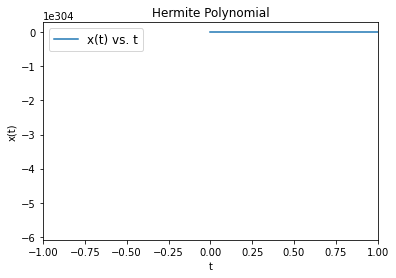

In [10]:
#pr=[alp,bet,gam,delt,omg]
#f(pr,x,y,dydx)
def f(pr,x,y,dydx):
    m=pr
    return 2*x*dydx-2*m*y
m=2
pr=m
x=0
y=-2
dydx=0
dx=0.01
X=50
tt,xx,ddydx,ddy2dx2=RK4_2D(f,pr,x,y,dydx,dx,X)
plt.plot(tt,xx,label='x(t) vs. t')
plt.xlabel('t')
plt.ylabel('x(t)')
plt.xlim(-1,1)
plt.title("Hermite Polynomial")
plt.legend(loc='best',prop={'size':12})
plt.show()